# Exploratory Data Analysis: Grantnav Dataset (Downloaded 20/04/2021)

**Research Question**
    
Is it possible to predict grant value from description keywords, location-based data and/or other characteristics?

## 0.0 Libraries

In [1]:
%load_ext autoreload
%autoreload 2

#system
import os
import sys
from os.path import join as pj
module_path = os.path.abspath(pj('..','..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# data
import pandas as pd
import numpy as np

# viz
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('bmh')
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import missingno as msno

# configurations
from pathlib import Path
from dotenv import find_dotenv, load_dotenv
import configparser

#stats
import scipy

# utils
from src.d00_utils import print_helper_functions as phf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 0.1 Configurations and Directories

In [498]:
# not used in this stub but often useful for finding various files
project_dir = Path().resolve().parents[1]
print(project_dir)

# find .env automagically by walking up directories until it's found, then
# load up the .env entries as environment variables
_ = load_dotenv(find_dotenv())

raw_dir = pj(project_dir, 'data', os.environ.get('RAW_DIR'))
interim_dir = pj(project_dir, 'data', os.environ.get('INTERIM_DIR'))
processed_dir = pj(project_dir, 'data', os.environ.get('PROCESSED_DIR'))

/Users/marclawson/repositories/grantnav_10k_predictor


## 1.0 Load Data

In [3]:
data = pd.read_csv(pj(raw_dir,'grantnav-20210420153103.csv'))

/Users/marclawson/opt/anaconda3/envs/grantnav_10k_predictor/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (8,9,10,13,17,18,19,20,21,22,23,24,25,26,27,28,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,57,58,59,61,62,63,65,66,67,71,72,73,74,75) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## 1.1 Size and shape

In [4]:
data.head()
data.shape

,Identifier,Title,Description,Currency,Amount Applied For,Amount Awarded,Amount Disbursed,Award Date,URL,Planned Dates:Start Date,Planned Dates:End Date,Planned Dates:Duration (months),Actual Dates:Start Date,Actual Dates:End Date,Actual Dates:Duration (months),...,Beneficiary Location:7:Country Code,Beneficiary Location:7:Geographic Code,Beneficiary Location:7:Geographic Code Type,From An Open Call?,The following fields are not in the 360 Giving Standard and are added by GrantNav.,Data Source,Publisher:Name,Recipient Region,Recipient District,Recipient District Geographic Code,Recipient Ward,Recipient Ward Geographic Code,Retrieved for use in GrantNav,License (see note),"Note, this file also contains OS data © Crown copyright and database right 2016, Royal Mail data © Royal Mail copyright and Database right 2016, National Statistics data © Crown copyright and database right 2015 & 2016, see http://grantnav.threesixtygiving.org/datasets/ for more information."
0,360G-SE-2011020480EXCH_2012-04-16,Active Men Project,Funding under Sport England's Sportsmatch fund...,GBP,NaN,41100.0,NaN,2012-04-16,NaN,2012-04-10,2013-03-31,11.0,NaN,NaN,NaN,...,NaN,NaN,NaN,Yes,NaN,https://sportengland-production-files.s3.eu-we...,Sport England,North West,Liverpool District,E08000012,Kirkdale Ward,E05000900,NaN,http://www.nationalarchives.gov.uk/doc/open-go...,NaN
1,360G-SE-2012000041EXCH_2012-04-16,Sporting Futures Leadership Academy,Funding under Sport England's Sportsmatch fund...,GBP,NaN,6000.0,NaN,2012-04-16,NaN,2012-05-01,2013-04-30,11.0,NaN,NaN,NaN,...,NaN,NaN,NaN,Yes,NaN,https://sportengland-production-files.s3.eu-we...,Sport England,East Midlands,City of Derby,E06000015,Boulton Ward,E05001772,NaN,http://www.nationalarchives.gov.uk/doc/open-go...,NaN
2,360G-SE-2012000173EXCH_2012-04-16,Choices,Funding under Sport England's Sportsmatch fund...,GBP,NaN,36750.0,NaN,2012-04-16,NaN,2012-04-22,2013-04-21,11.0,NaN,NaN,NaN,...,NaN,NaN,NaN,Yes,NaN,https://sportengland-production-files.s3.eu-we...,Sport England,North West,Liverpool District,E08000012,Greenbank Ward,E05000898,NaN,http://www.nationalarchives.gov.uk/doc/open-go...,NaN
3,360G-SE-2012000554EXCH_2012-04-16,Florrie Sports,Funding under Sport England's Sportsmatch fund...,GBP,NaN,15000.0,NaN,2012-04-16,NaN,2012-04-23,2013-03-31,11.0,NaN,NaN,NaN,...,NaN,NaN,NaN,Yes,NaN,https://sportengland-production-files.s3.eu-we...,Sport England,North West,Liverpool District,E08000012,Princes Park Ward,E05000906,NaN,http://www.nationalarchives.gov.uk/doc/open-go...,NaN
4,360G-SE-2010011194LOTT_2012-04-17,Engaging children and adults in Kwic Cricket s...,Funding under Sport England's Small Grants fun...,GBP,NaN,692.0,NaN,2012-04-17,NaN,2012-04-16,2012-07-18,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,Yes,NaN,https://sportengland-production-files.s3.eu-we...,Sport England,North East,Sunderland District,E08000024,Washington East Ward,E05001174,NaN,http://www.nationalarchives.gov.uk/doc/open-go...,NaN


(561424, 79)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561424 entries, 0 to 561423
Data columns (total 79 columns):
 #   Column                                                                                                                                                                                                                                                                                                Non-Null Count   Dtype  
---  ------                                                                                                                                                                                                                                                                                                --------------   -----  
 0   Identifier                                                                                                                                                                                                                                  

## 1.2 Null values

In [ ]:
data.info()

There seems to be a lot of null columns here.  I should check this and remove un- or partially-filled columns.  There are also obviously redundant columns at the end.  It would be helpful to visualise the nulls.

<AxesSubplot:>

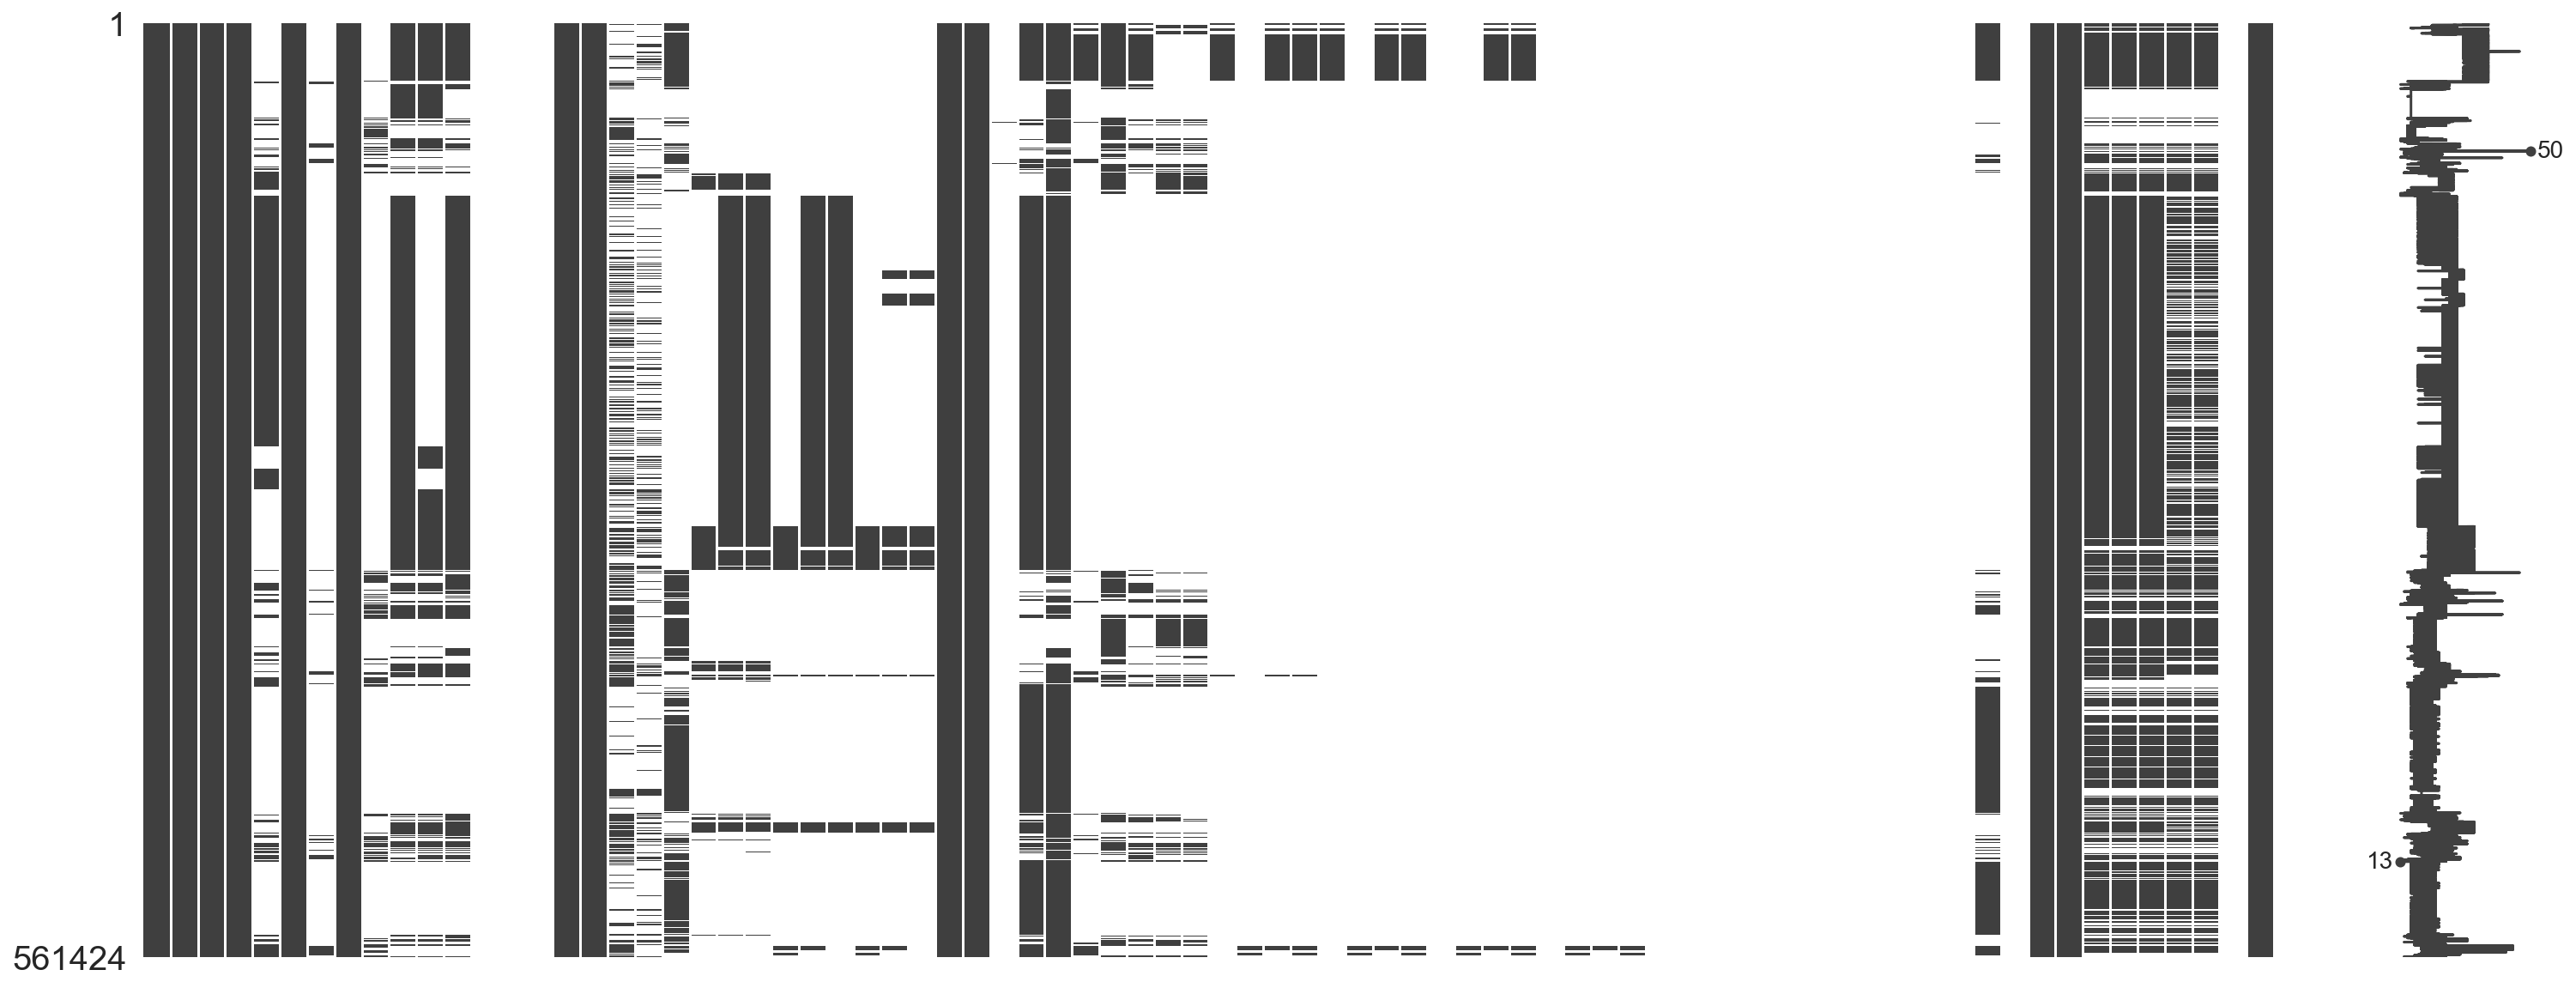

In [15]:
msno.matrix(data)

In [16]:
df_nonullcols = data.dropna(how='all', axis=1)
df_nonullcols = df_nonullcols[[c for c in df_nonullcols.columns if c not in ['License (see note)', 'Data Source', 'From An Open Call?']]]

There should be a threshold for the number of null values I'm willing to accept: Filter columns that don't meet the threshold.

------------------------------------------------------------------------------------------------------------------------
0.0: 


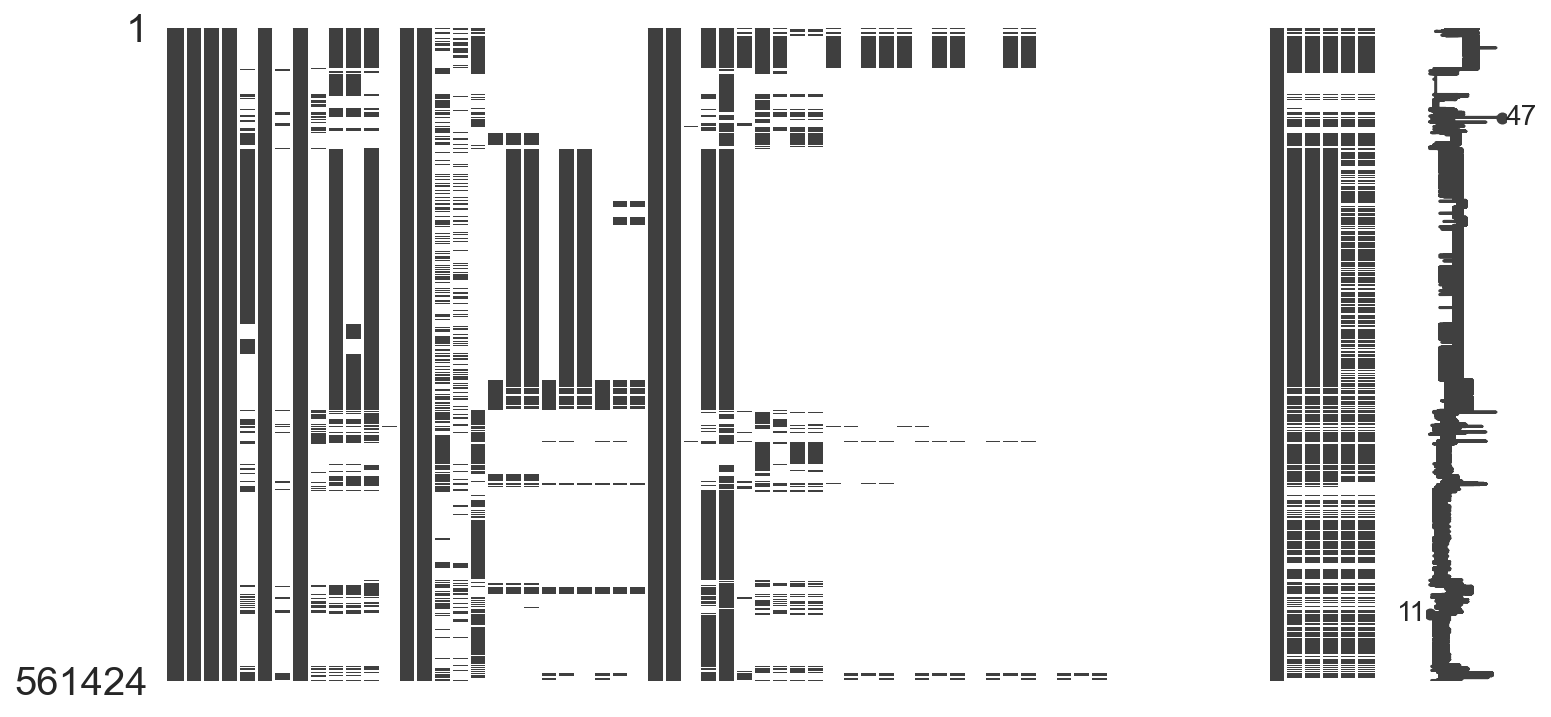

Number of columns: 68 (100.0% remaining)
Columns removed:
[]
END OF ITERATION [0.0]


------------------------------------------------------------------------------------------------------------------------
0.17: 


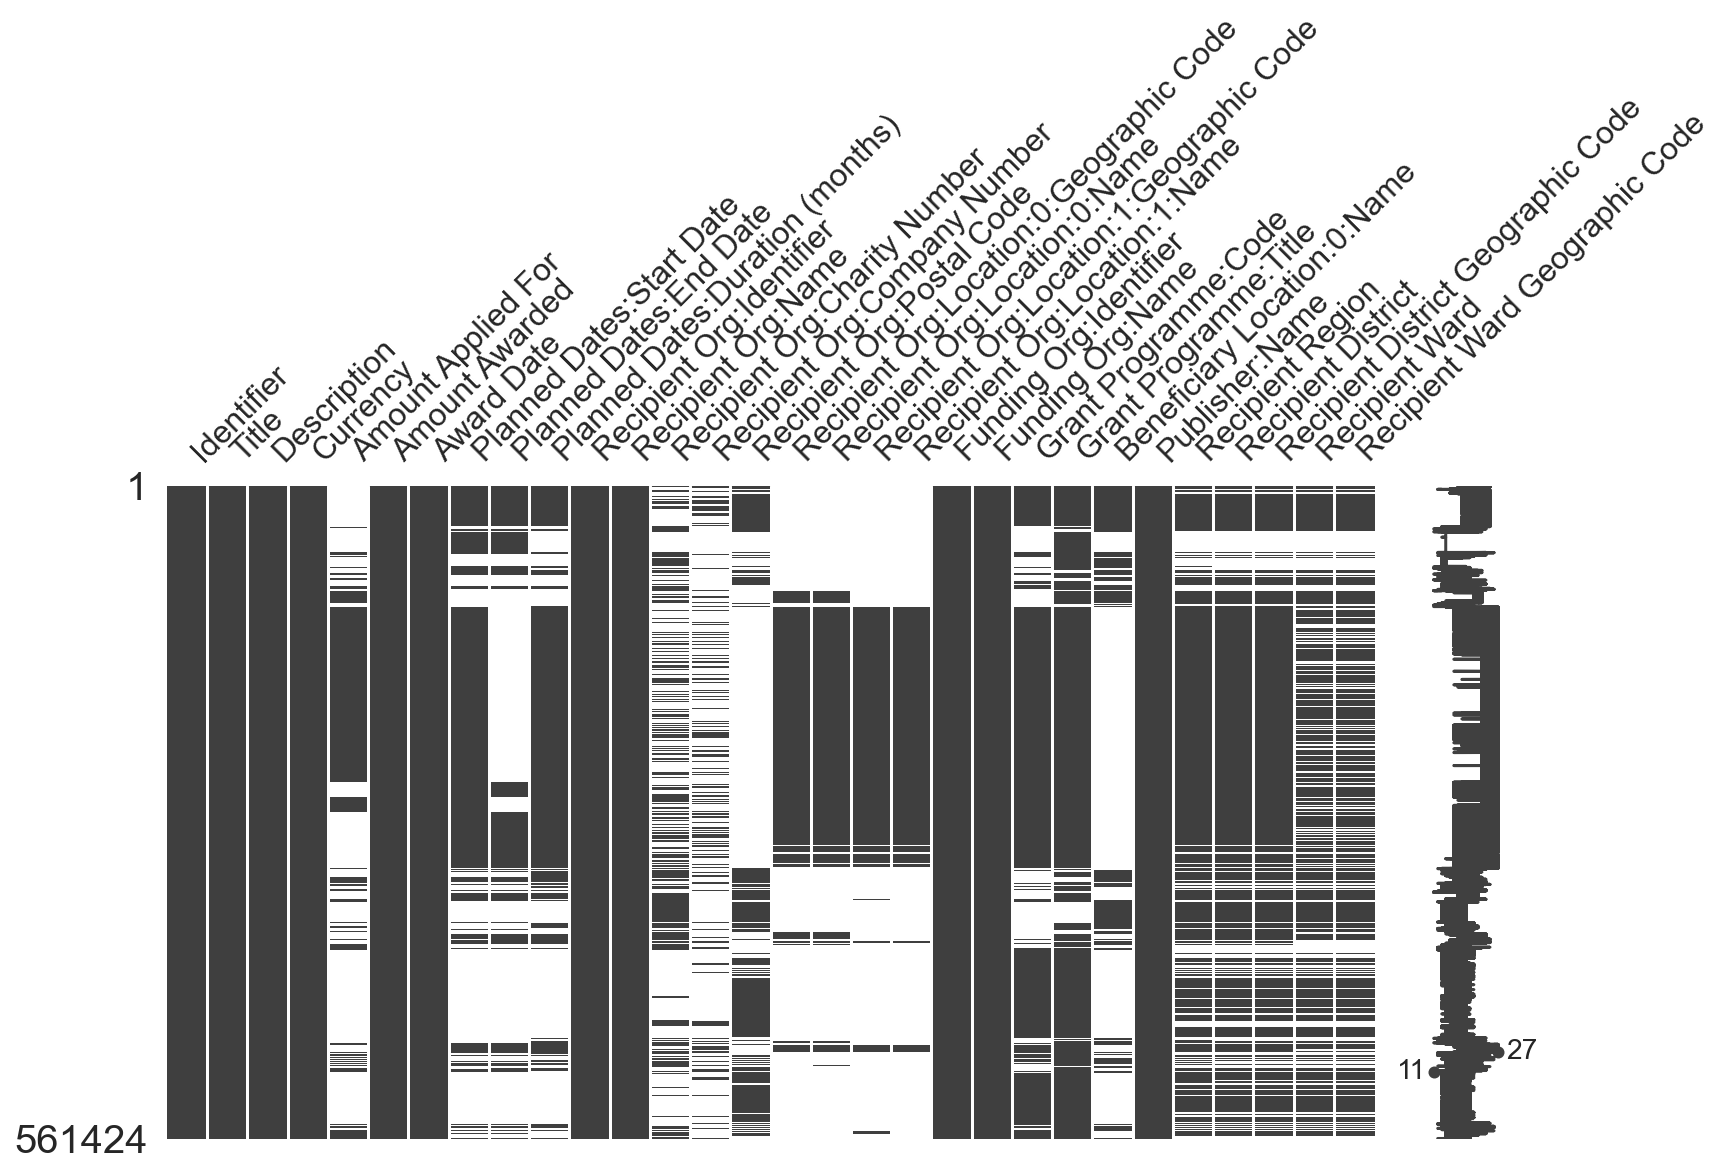

Number of columns: 30 (44.1% remaining)
Columns removed:
['Beneficiary Location:2:Name', 'Beneficiary Location:4:Geographic Code Type', 'Beneficiary Location:2:Geographic Code', 'Beneficiary Location:7:Name', 'Recipient Org:Location:0:Geographic Code Type', 'Beneficiary Location:1:Name', 'Beneficiary Location:6:Name', 'Beneficiary Location:2:Country Code', 'Actual Dates:End Date', 'Beneficiary Location:3:Country Code', 'Beneficiary Location:7:Geographic Code Type', 'Grant Programme:URL', 'Beneficiary Location:3:Geographic Code', 'Beneficiary Location:1:Geographic Code Type', 'Recipient Org:Location:2:Geographic Code Type', 'Beneficiary Location:6:Geographic Code Type', 'Beneficiary Location:4:Country Code', 'Beneficiary Location:2:Geographic Code Type', 'Recipient Org:Location:1:Geographic Code Type', 'Beneficiary Location:1:Country Code', 'Beneficiary Location:5:Geographic Code Type', 'Beneficiary Location:4:Name', 'Beneficiary Location:3:Name', 'Funding Org:Postal Code', 'Amount Disb

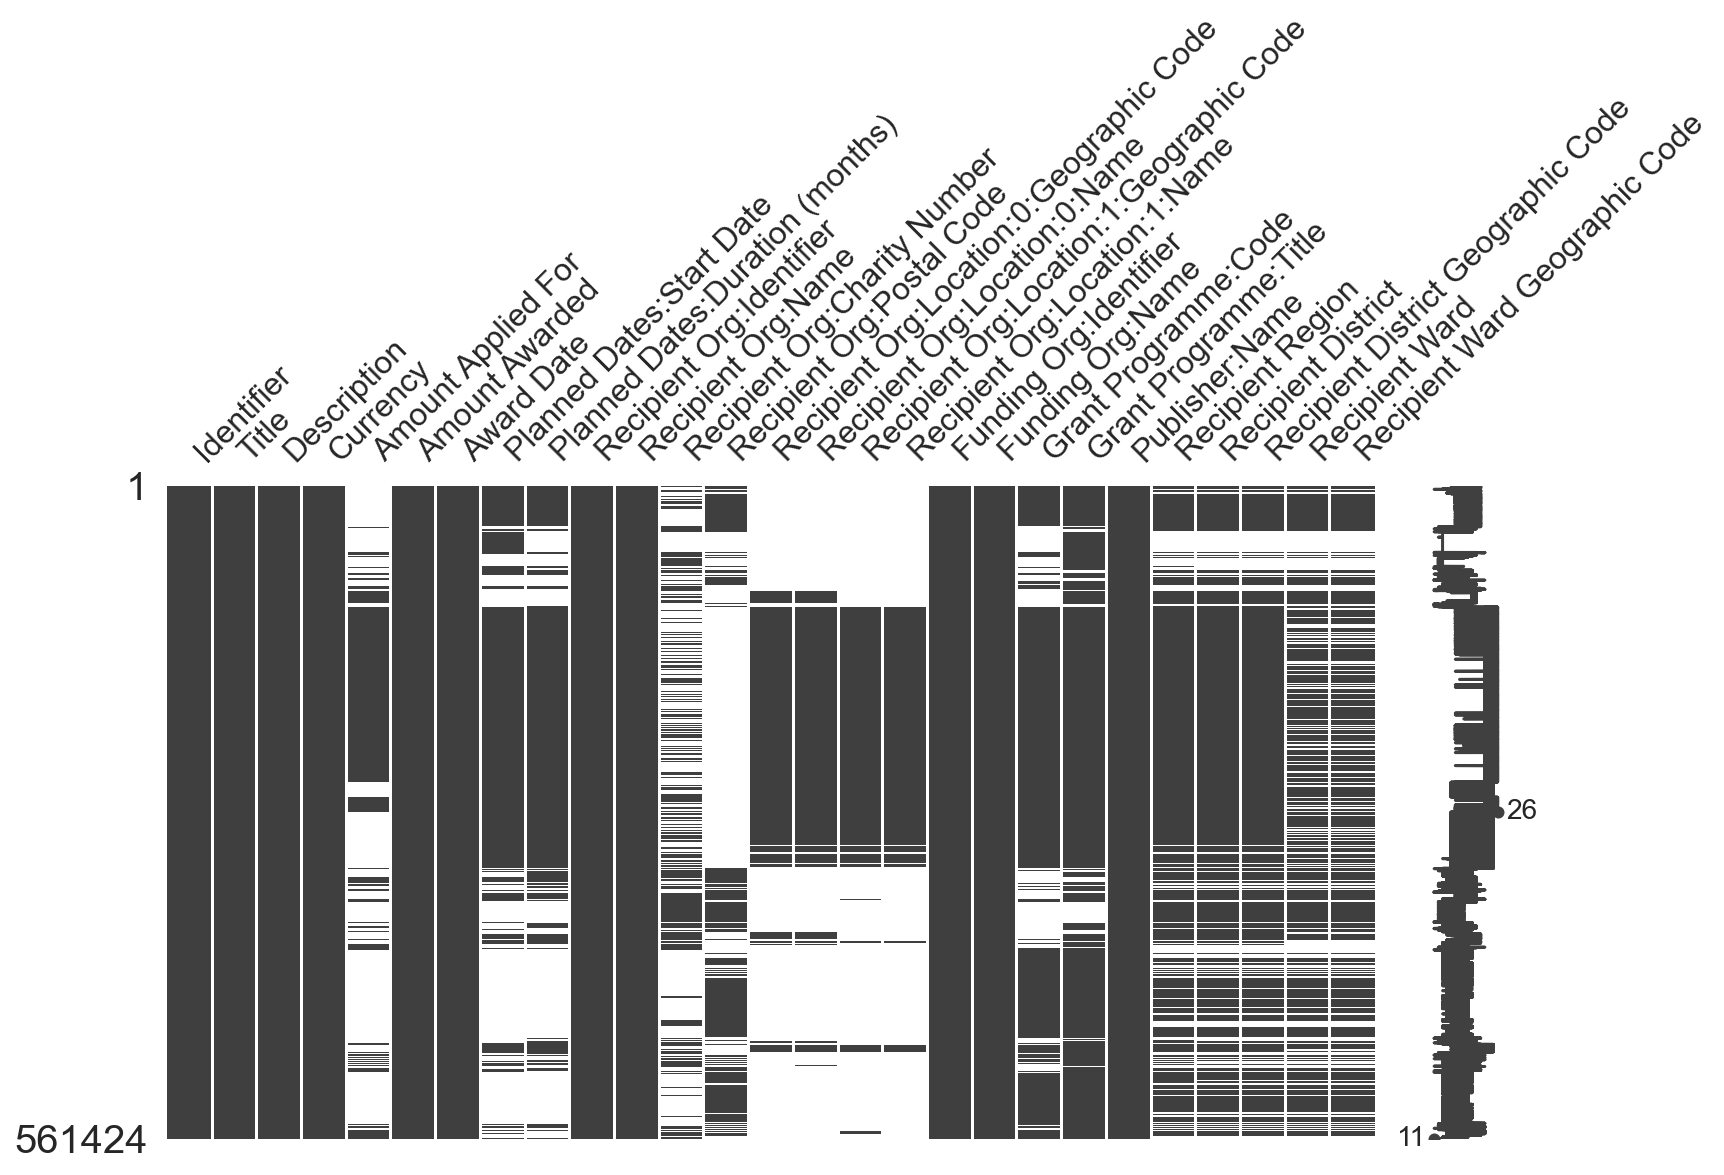

Number of columns: 27 (39.7% remaining)
Columns removed:
['Beneficiary Location:0:Name', 'Recipient Org:Company Number', 'Planned Dates:End Date']
END OF ITERATION [0.33]


------------------------------------------------------------------------------------------------------------------------
0.5: 


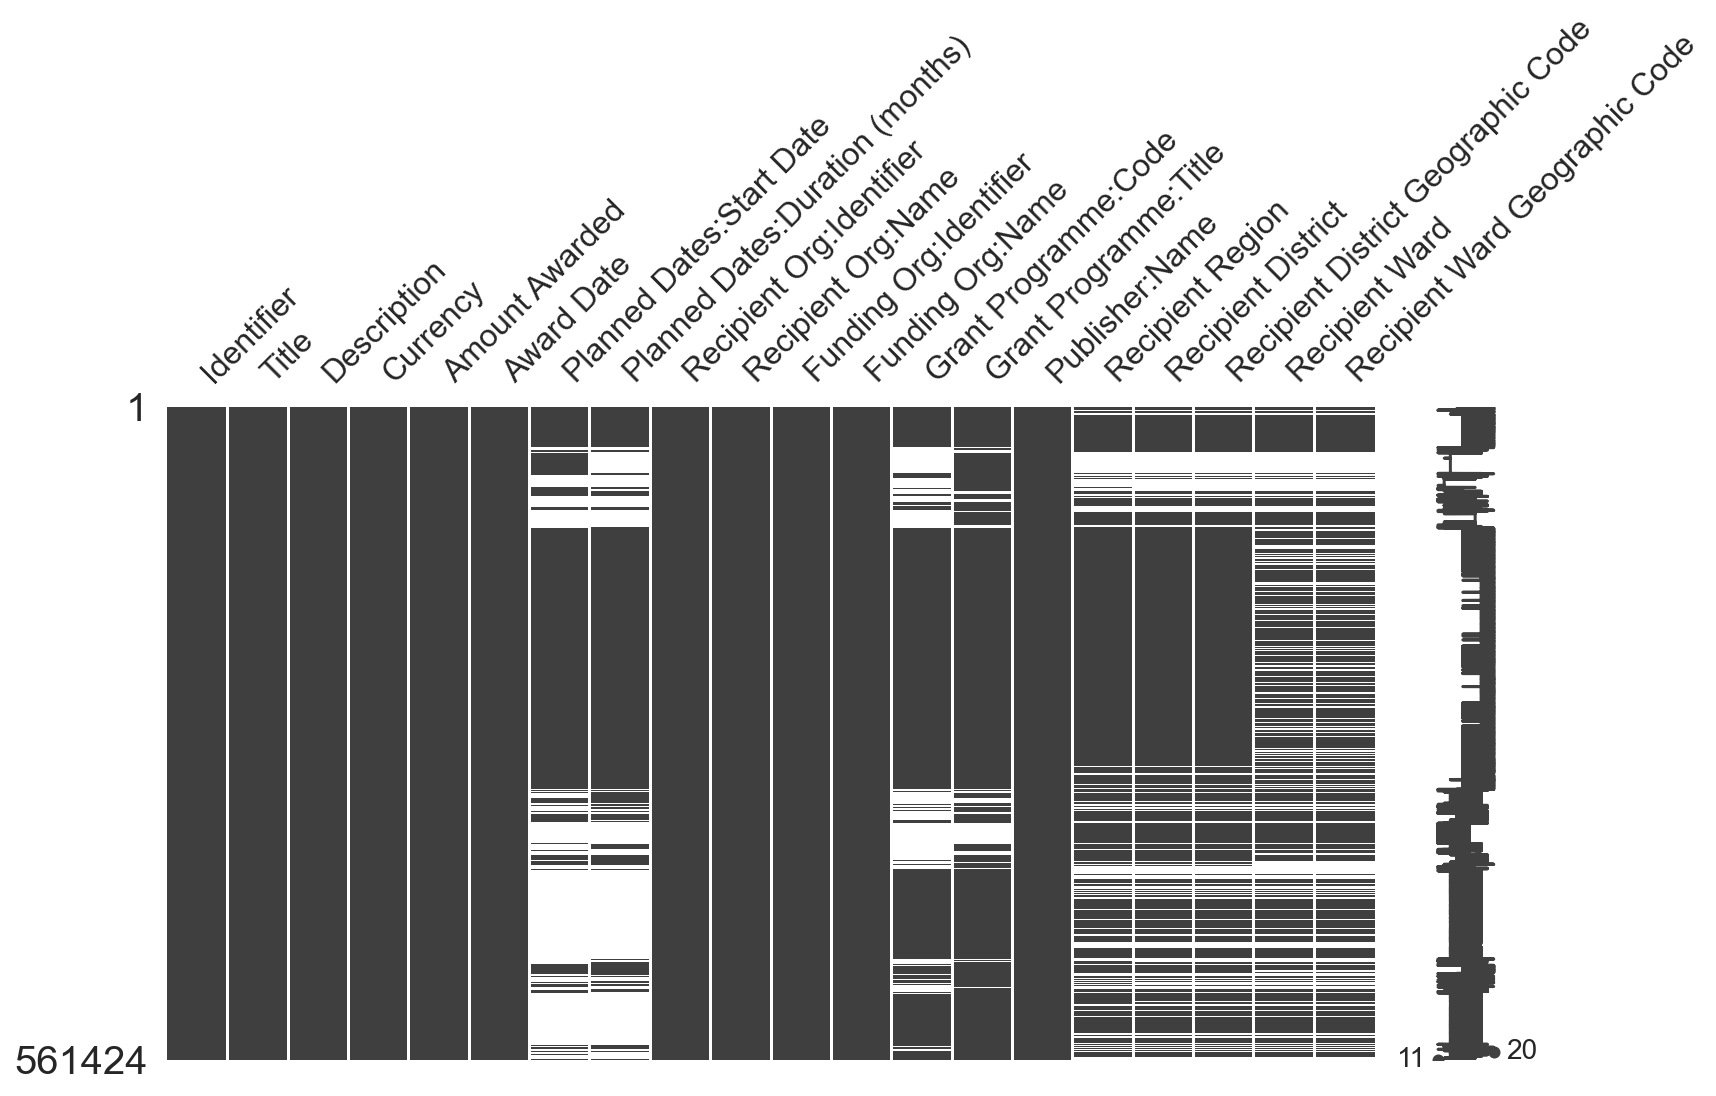

Number of columns: 20 (29.4% remaining)
Columns removed:
['Recipient Org:Location:0:Name', 'Recipient Org:Location:1:Geographic Code', 'Amount Applied For', 'Recipient Org:Postal Code', 'Recipient Org:Charity Number', 'Recipient Org:Location:1:Name', 'Recipient Org:Location:0:Geographic Code']
END OF ITERATION [0.5]


------------------------------------------------------------------------------------------------------------------------
0.67: 


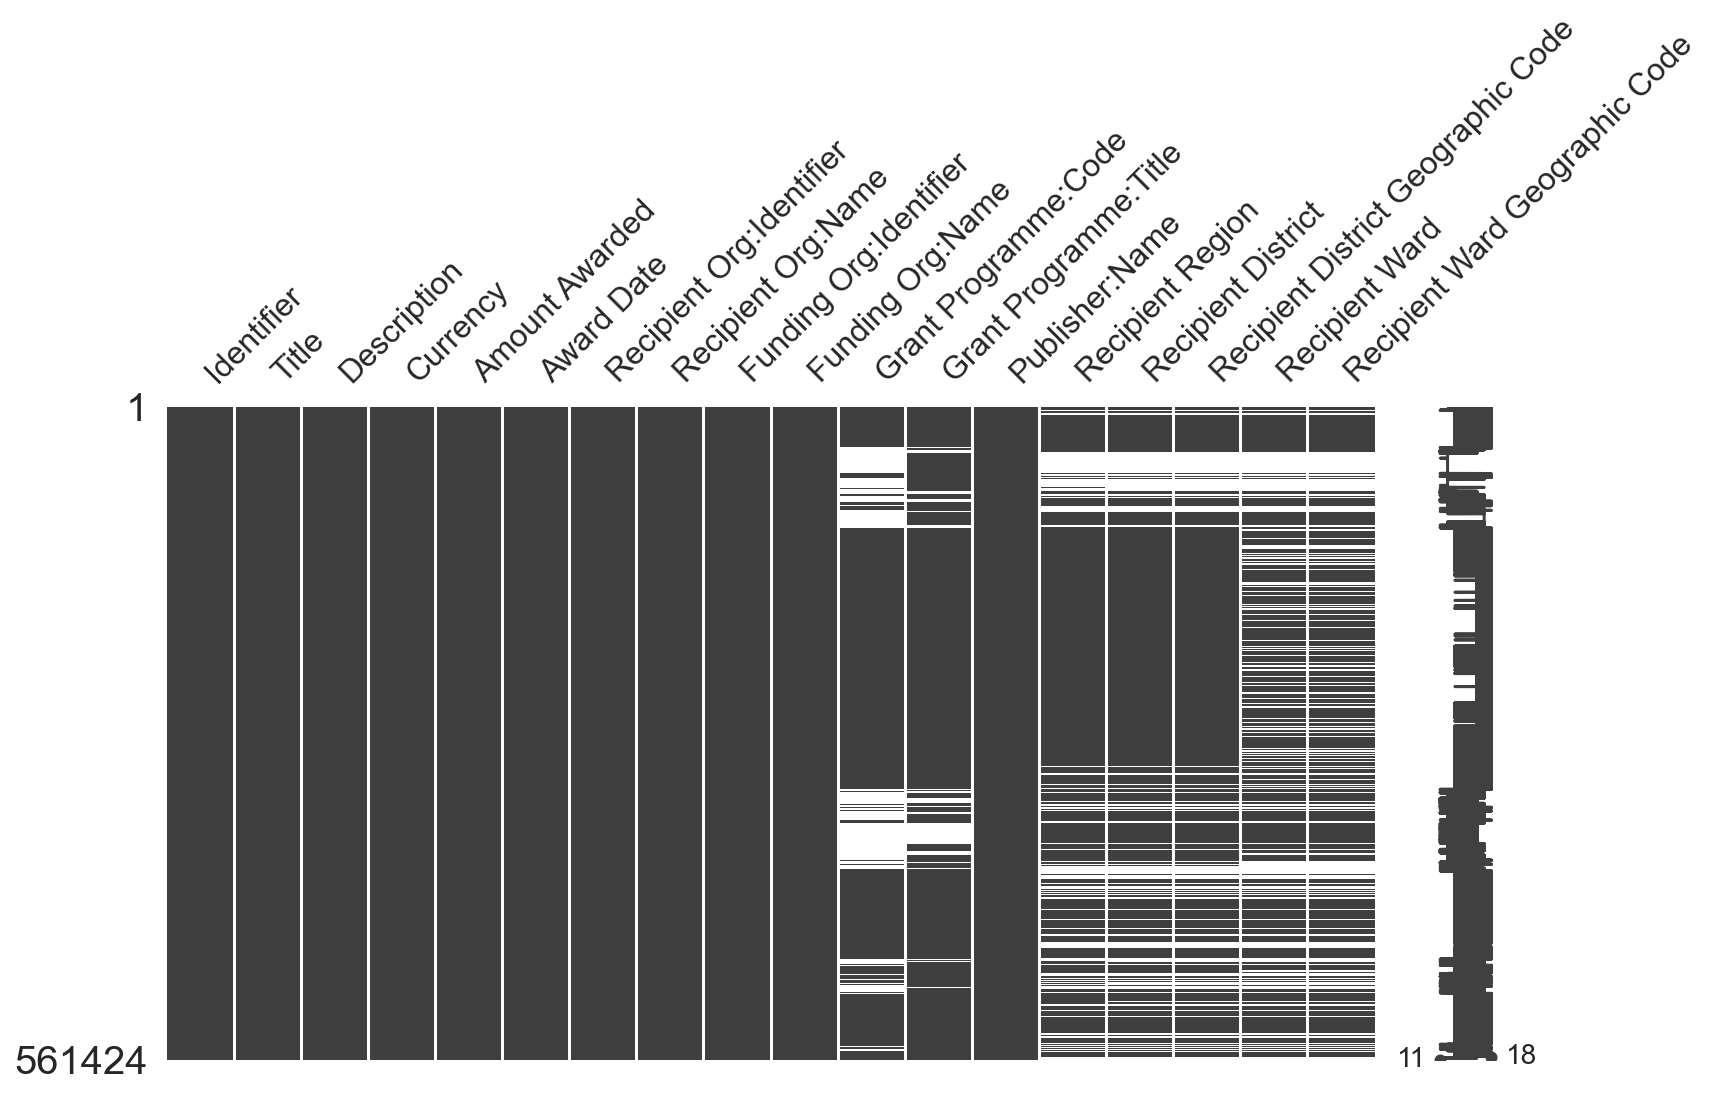

Number of columns: 18 (26.5% remaining)
Columns removed:
['Planned Dates:Duration (months)', 'Planned Dates:Start Date']
END OF ITERATION [0.67]


------------------------------------------------------------------------------------------------------------------------
0.83: 


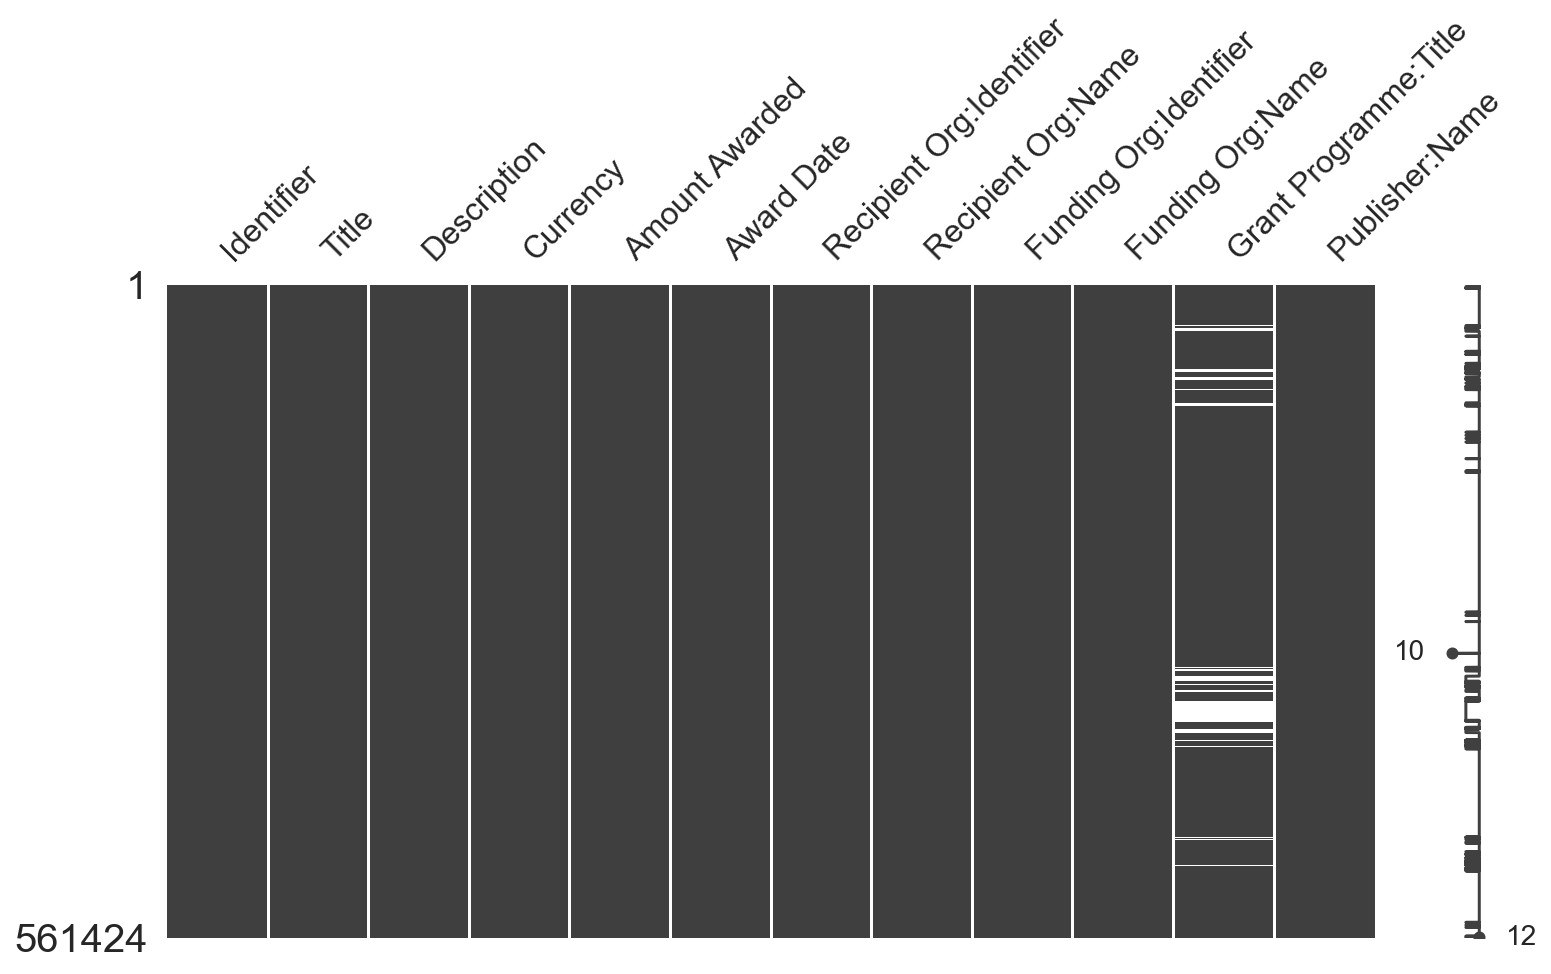

Number of columns: 12 (17.6% remaining)
Columns removed:
['Grant Programme:Code', 'Recipient Ward Geographic Code', 'Recipient District', 'Recipient Ward', 'Recipient Region', 'Recipient District Geographic Code']
END OF ITERATION [0.83]


------------------------------------------------------------------------------------------------------------------------
1.0: 


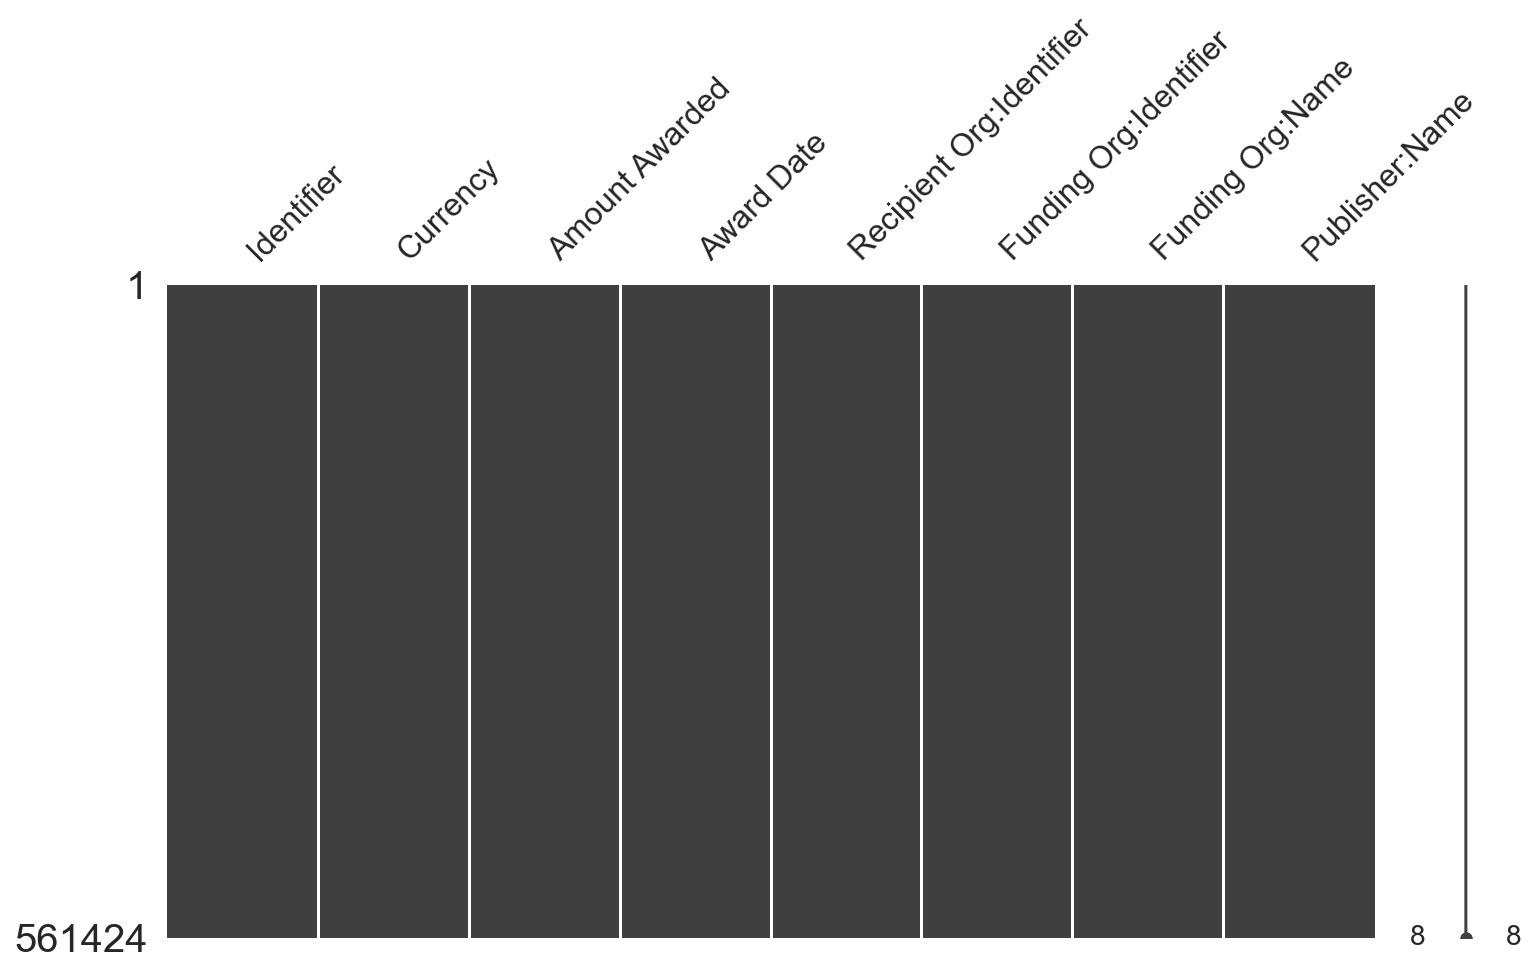

Number of columns: 8 (11.8% remaining)
Columns removed:
['Recipient Org:Name', 'Description', 'Title', 'Grant Programme:Title']
END OF ITERATION [1.0]




In [17]:
removed_cols = []
removed_cols_by_thresh = {}
for i in np.linspace(0, 1, 7):
    above_thresh_columns = [c for c in df_nonullcols.columns if df_nonullcols[c].value_counts().sum()/df_nonullcols.shape[0]>=i]
    below_thresh_columns = [c for c in df_nonullcols.columns if c not in above_thresh_columns]
    df = df_nonullcols[above_thresh_columns]
    new_removed_cols = [c for c in set(below_thresh_columns) if c not in set(removed_cols)]
    removed_cols.extend(below_thresh_columns)
    msno.matrix(df, figsize=(12,6))
    print('-'*120)
    print(f"{round(i,2)}: ")
    plt.show();
    print(f"Number of columns: {df.shape[1]} ({round((df.shape[1]/df_nonullcols.shape[1])*100,1):,.1f}% remaining)")
    print(f"Columns removed:\n{new_removed_cols}")
    removed_cols_by_thresh[round(i,2)] = {'keep': above_thresh_columns, 'remove': new_removed_cols}
    print(f"END OF ITERATION [{round(i,2)}]")
    print()
    print()
plt.show();

### 1.2.1 Columns for threshold 0.33 - 0.5

Accepting columns with at most half of values being null allows us to examine beneficiary but not for the one-third null-valued columns.  A lot of the columns that have been removed between 0.5 and 0.33 contain the recipient geography data and a few other potentially useful measures.  

Q: **Do we need these columns?**

In [18]:
# drop rows in the 0.33 - 0.5 threshold range and check
columns_to_compare = []
for k, v in removed_cols_by_thresh.items(): # thresh/columns
        if .33 < k <= .5:
            for c in v['remove']:
                df = df_nonullcols[v['keep']+v['remove']].dropna(subset=[c])
                print(f"{c}: {df.shape[0]} rows")

Recipient Org:Location:0:Name: 249345 rows
Recipient Org:Location:1:Geographic Code: 231369 rows
Amount Applied For: 225525 rows
Recipient Org:Postal Code: 228635 rows
Recipient Org:Charity Number: 219985 rows
Recipient Org:Location:1:Name: 228633 rows
Recipient Org:Location:0:Geographic Code: 248827 rows


One column of interest is `Beneficiary Location:0:Name` as where a grant is spent could predict a value of a grant.  The geographic code for this was dropped between threshold 0 - 0.33, which could cause an issue if we need to match names.  To keep this column, the number of rows would reduce to 144,678 (out of 561,424).

The other column of interest is `Recipient Org:Location:0:Geographic Code` for the same reason.  This would leave around 100k more rows than benficiary name.  However, the higher thresholds are recording geographical info for region, district and ward so may not be critical.

Another column that could be of interest is `Amount Applied For`.  This is recorded for around half of the rows in the dataset.  The question is whether this is useful enough for us to sample half of the organisations.  

Q: **Which funders are recording `Amount Applied For`?**

In [19]:
phf.print_full(round(df_nonullcols.groupby('Funding Org:Name')['Amount Applied For'].count().sort_values(ascending=False)\
        /df_nonullcols.groupby('Funding Org:Name')['Amount Applied For'].count().sort_values(ascending=False).sum()*100,1).head(10))

Funding Org:Name
The National Lottery Community Fund                                          72.40
The National Lottery Heritage Fund                                            4.50
Scottish Government                                                           2.40
Northern Rock Foundation                                                      1.90
Community Foundation serving Tyne & Wear and Northumberland                   1.80
Quartet Community Foundation                                                  1.60
City Bridge Trust                                                             1.40
Paul Hamlyn Foundation                                                        1.20
Community Foundation for Surrey                                               1.00
Suffolk Community Foundation                                                  0.90
Name: Amount Applied For, dtype: float64

Most of the data for `Amount Applied For` is provided by one organisation, `The National Lottery Community Fund`.  How does this compare to the overall completion pattern for data?

In [20]:
round(df_nonullcols['Funding Org:Name'].value_counts(normalize=True)*100,1).head(10)

The National Lottery Community Fund                        41.2
Department for Education                                    6.9
Sport England                                               5.5
Department for Business, Energy and Industrial Strategy     4.7
The Wellcome Trust                                          3.1
Co-operative Group                                          2.9
The National Lottery Heritage Fund                          1.8
Department for Environment, Food and Rural Affairs          1.6
Ministry for Housing, Communities and Local Government      1.3
Garfield Weston Foundation                                  1.2
Name: Funding Org:Name, dtype: float64

Less than half of all data comes from `The National Lottery Community Fund` so is less than the completion rate for `Amount Applied For` but is still a siginificant percentage.  It may be that data has to be separated for this organisation.  However, for present purposes `Amount Applied For` could be used for `The National Lottery Community Fund` but perhaps not for others.

### 1.2.2 Columns for threshold 0.5 - 0.67

In [21]:
removed_cols_by_thresh[0.67]['remove']

['Planned Dates:Duration (months)', 'Planned Dates:Start Date']

`Planned Dates:Start Date` does not seem particularly important to grant value because we can get dates from award date.  However, the duration of a grant -`Planned Dates:Duration (months)`- could well be a strong predictor of the value of a grant awarded.  

In [22]:
# drop rows in the 0.5 - 0.67 threshold range and check
columns_to_compare = []
for k, v in removed_cols_by_thresh.items(): # thresh/columns
    if .5 < k <= .67:
        for c in v['remove']:
            df = df_nonullcols[v['keep']+[c]]
            print(f"Rows remaining {[c]} = {df.shape[0]} - {df.isnull().sum().max()} = {df.shape[0]-df.isnull().sum().max()}")
            print()

Rows remaining ['Planned Dates:Duration (months)'] = 561424 - 229794 = 331630

Rows remaining ['Planned Dates:Start Date'] = 561424 - 222262 = 339162



### 1.2.3 Columns for threshold 0.67 - 0.83

In [23]:
removed_cols_by_thresh[0.83]['remove']

['Grant Programme:Code',
 'Recipient Ward Geographic Code',
 'Recipient District',
 'Recipient Ward',
 'Recipient Region',
 'Recipient District Geographic Code']

Geographic data seems immportant because a grant for a park in the North East of England might be less than a grant for a similar project in London, for example.

In [27]:
# drop rows in the 0.67- 0.83 threshold range and check
columns_to_compare = []
for k, v in removed_cols_by_thresh.items(): # thresh/columns
    if .67 < k <= .83:
        for c in v['remove']:
            df = df_nonullcols[v['keep']+[c]]
            print(f"Rows remaining {[c]} = {df.shape[0]} - {df.isnull().sum().max()} = {df.shape[0]-df.isnull().sum().max()}")
            print()

Rows remaining ['Grant Programme:Code'] = 561424 - 229794 = 331630

Rows remaining ['Recipient Ward Geographic Code'] = 561424 - 229794 = 331630

Rows remaining ['Recipient District'] = 561424 - 229794 = 331630

Rows remaining ['Recipient Ward'] = 561424 - 229794 = 331630

Rows remaining ['Recipient Region'] = 561424 - 229794 = 331630

Rows remaining ['Recipient District Geographic Code'] = 561424 - 229794 = 331630



Removing vital geographical data leaves us with 331k rows.  We'll have to check correlations to see how important this is.

### 1.2.4 Columns for threshold 0.83 - 1.0

In [28]:
removed_cols_by_thresh[1.0]['remove']

['Recipient Org:Name', 'Description', 'Title', 'Grant Programme:Title']

Geographic data seems immportant because a grant for a park in the North East of England might be less than a grant for a similar project in London, for example.

In [29]:
# drop rows in the 0.83- 1.0 threshold range and check
columns_to_compare = []
for k, v in removed_cols_by_thresh.items(): # thresh/columns
    if .83 < k <= 1.0:
        for c in v['remove']:
            df = df_nonullcols[v['keep']+[c]]
            print(f"Rows remaining {[c]} = {df.shape[0]} - {df.isnull().sum().max()} = {df.shape[0]-df.isnull().sum().max()}")
            print()

Rows remaining ['Recipient Org:Name'] = 561424 - 3 = 561421

Rows remaining ['Description'] = 561424 - 16 = 561408

Rows remaining ['Title'] = 561424 - 15 = 561409

Rows remaining ['Grant Programme:Title'] = 561424 - 49147 = 512277



I think we can drop the rows without descriptions and title (they may be the same but the numbers are very low).  `Grant Programme:Title` is not important since we have the title and description already.

### 1.2.5 Creating the dataset for checking distribution and correlations

Let's try and keep `Recipient District Geographic Code` and `Planned Dates:Duration (months)`.  We may have to impute the planned dates variable.  Could we use `Amount Applied For` later? - It would probably be an extension to this project so will leave for now.

In [68]:
columns_to_keep = removed_cols_by_thresh[0.83]['keep']
columns_to_keep.extend(['Recipient District Geographic Code','Planned Dates:Duration (months)'])
columns_to_keep = list(set(columns_to_keep))
columns_to_keep

['Recipient Org:Identifier',
 'Currency',
 'Title',
 'Recipient Org:Name',
 'Funding Org:Name',
 'Description',
 'Amount Awarded',
 'Grant Programme:Title',
 'Award Date',
 'Funding Org:Identifier',
 'Publisher:Name',
 'Recipient District Geographic Code',
 'Identifier',
 'Planned Dates:Duration (months)']

In [69]:
# order columns and make them code friendly
columns_to_keep = [
    'Identifier',
    'Currency',
    'Title',
    'Description',
    'Amount Awarded',
    'Award Date',
    'Recipient Org:Identifier',
    'Recipient Org:Name',
    'Funding Org:Identifier',
    'Funding Org:Name',
    'Recipient District Geographic Code',
    'Planned Dates:Duration (months)'
]

columns_to_rename = {c: c.lower().replace(' ', '_').replace(':','_').replace('(','').replace(')','') for c in columns_to_keep}
columns_to_rename

{'Identifier': 'identifier',
 'Currency': 'currency',
 'Title': 'title',
 'Description': 'description',
 'Amount Awarded': 'amount_awarded',
 'Award Date': 'award_date',
 'Recipient Org:Identifier': 'recipient_org_identifier',
 'Recipient Org:Name': 'recipient_org_name',
 'Funding Org:Identifier': 'funding_org_identifier',
 'Funding Org:Name': 'funding_org_name',
 'Recipient District Geographic Code': 'recipient_district_geographic_code',
 'Planned Dates:Duration (months)': 'planned_dates_duration_months'}

In [73]:
# remove rows without description and title
df_final = df_nonullcols[columns_to_keep].dropna(subset=['Description','Title'])
df_final = df_final.rename(columns=columns_to_rename)
df_final.shape
df_final

(561394, 12)

,identifier,currency,title,description,amount_awarded,award_date,recipient_org_identifier,recipient_org_name,funding_org_identifier,funding_org_name,recipient_district_geographic_code,planned_dates_duration_months
0,360G-SE-2011020480EXCH_2012-04-16,GBP,Active Men Project,Funding under Sport England's Sportsmatch fund...,41100.0,2012-04-16,GB-COH-07626625,Positive Futures North Liverpool Ltd,GB-COH-RC000766,Sport England,E08000012,11.0
1,360G-SE-2012000041EXCH_2012-04-16,GBP,Sporting Futures Leadership Academy,Funding under Sport England's Sportsmatch fund...,6000.0,2012-04-16,GB-CHC-1041422,Sporting Futures,GB-COH-RC000766,Sport England,E06000015,11.0
2,360G-SE-2012000173EXCH_2012-04-16,GBP,Choices,Funding under Sport England's Sportsmatch fund...,36750.0,2012-04-16,GB-COH-01696490,Greenbank Project,GB-COH-RC000766,Sport England,E08000012,11.0
3,360G-SE-2012000554EXCH_2012-04-16,GBP,Florrie Sports,Funding under Sport England's Sportsmatch fund...,15000.0,2012-04-16,GB-COH-05330850,The Florence Institute Trust Ltd,GB-COH-RC000766,Sport England,E08000012,11.0
4,360G-SE-2010011194LOTT_2012-04-17,GBP,Engaging children and adults in Kwic Cricket s...,Funding under Sport England's Small Grants fun...,692.0,2012-04-17,360G-SE-Barmston Village Primary School,Barmston Village Primary School,GB-COH-RC000766,Sport England,E08000024,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
561419,360G-EQFoundation-0117,GBP,Grant to Upreach Charitable Company,Unrestricted,15000.0,2021-03-10,GB-CHC-1158896,Upreach Charitable Company,GB-CHC-1161209,The EQ Foundation,NaN,NaN
561420,360G-EQFoundation-0118,GBP,Grant to Five Talents,Via The Funding Network,2000.0,2021-03-15,GB-CHC-1113969,Five Talents UK,GB-CHC-1161209,The EQ Foundation,NaN,NaN
561421,360G-EQFoundation-0119,GBP,Grant to Five Talents,Via The Funding Network,2000.0,2021-03-15,GB-CHC-1155064,Global Feedback,GB-CHC-1161209,The EQ Foundation,NaN,NaN
561422,360G-EQFoundation-0120,GBP,Grant to Foodcycle,Unrestricted,15000.0,2021-03-25,GB-CHC-1134423,Foodcycle,GB-CHC-1161209,The EQ Foundation,NaN,NaN


In [164]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 561394 entries, 0 to 561423
Data columns (total 12 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   identifier                          561394 non-null  object 
 1   currency                            561394 non-null  object 
 2   title                               561394 non-null  object 
 3   description                         561394 non-null  object 
 4   amount_awarded                      561394 non-null  float64
 5   award_date                          561394 non-null  object 
 6   recipient_org_identifier            561394 non-null  object 
 7   recipient_org_name                  561391 non-null  object 
 8   funding_org_identifier              561394 non-null  object 
 9   funding_org_name                    561394 non-null  object 
 10  recipient_district_geographic_code  454666 non-null  object 
 11  planned_dates_duration_mon

#### 1.2.5.1 Imputing Data

##### Duration of Grant

In [161]:
duration = df_final[['identifier','planned_dates_duration_months']].set_index('identifier',drop=True).copy()
duration.describe()

,planned_dates_duration_months
count,331604.000000
mean,15.266915
std,11.951011
min,0.000000
25%,12.000000
50%,12.000000
75%,12.000000
max,1080.000000


planned_dates_duration_months    12.0
dtype: float64

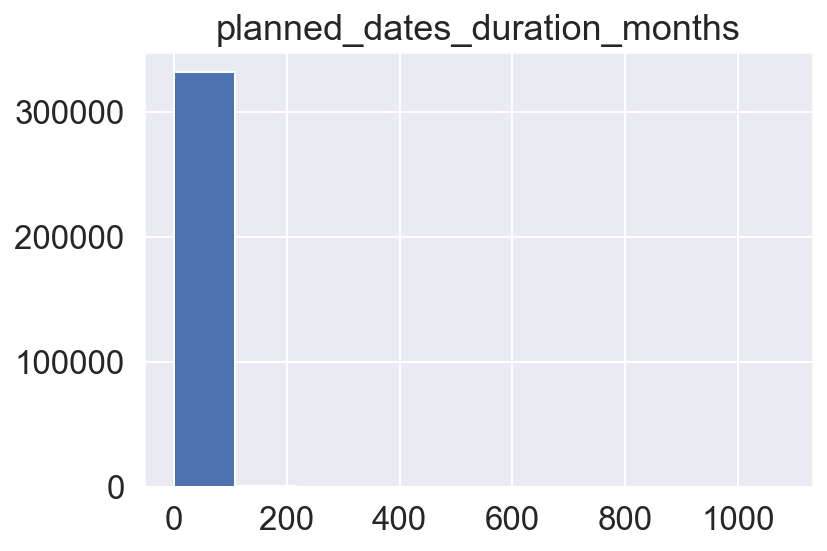

In [133]:
duration.hist();

,planned_dates_duration_months
identifier,
360G-EssexCF-A471138,"1,080.00"
360G-tnlcomfund-0010346386,432.00
360G-tnlcomfund-0031052103,372.00
360G-EFF-14-0063,240.00
360G-DevonCF-A560967,224.00
360G-SE-2020017631LOTT_2020-06-12,220.00
360G-HeartofEnglandCF-A548690,219.00
360G-CFNI-A545331,219.00
360G-LocalTrust-047,197.00


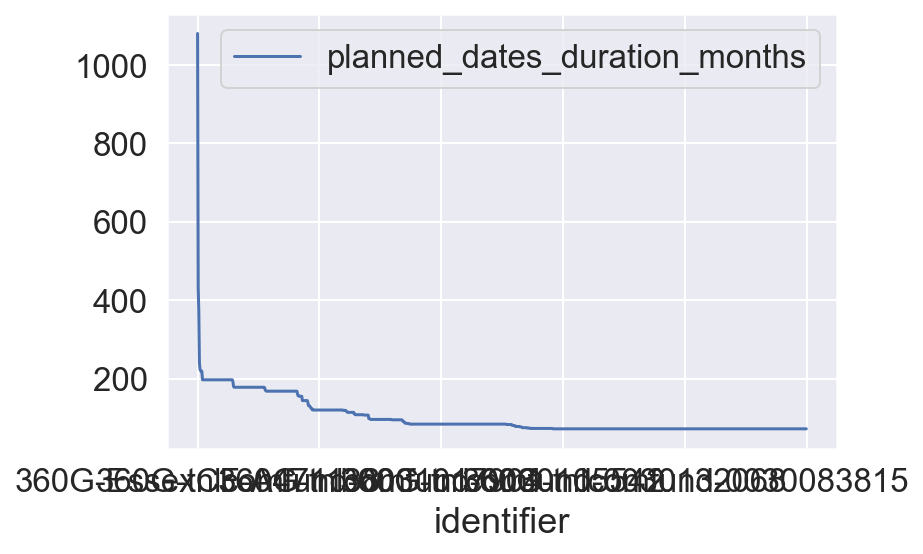

In [140]:
phf.print_full(duration.sort_values('planned_dates_duration_months', ascending=False).head(20))
duration.sort_values('planned_dates_duration_months', ascending=False).head(1000).plot();

There are some long-term projects that are skewing the planned duration variable. The top one is probably a mistake. If we're going to impute this variable we need to get some sort of normal distribution.

,planned_dates_duration_months
count,331415.000000
mean,15.170656
std,11.122155
min,0.000000
25%,12.000000
50%,12.000000
75%,12.000000
max,120.000000


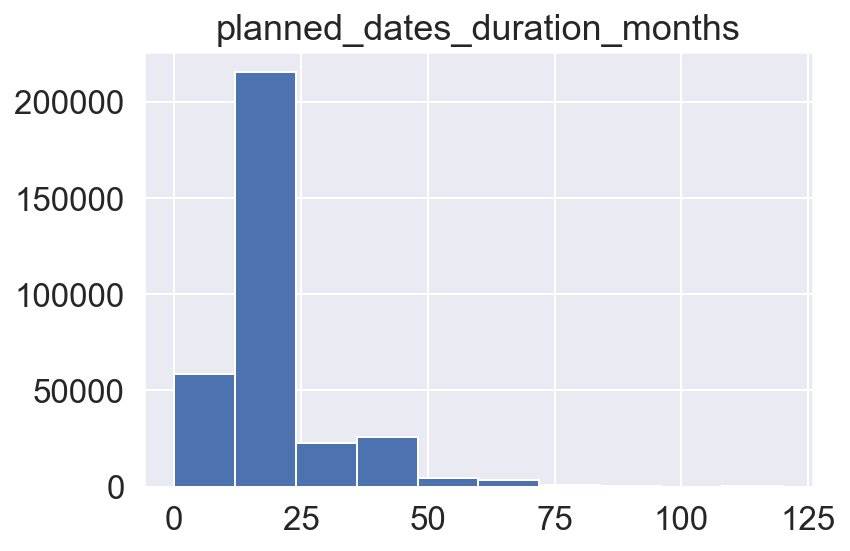

In [157]:
# let's look at projects less than or equal 10 years
duration[duration<=120].hist()
display(duration[duration<=120].describe())
plt.show();

,planned_dates_duration_months
count,330186.000000
mean,14.940449
std,10.449725
min,0.000000
25%,12.000000
50%,12.000000
75%,12.000000
max,60.000000


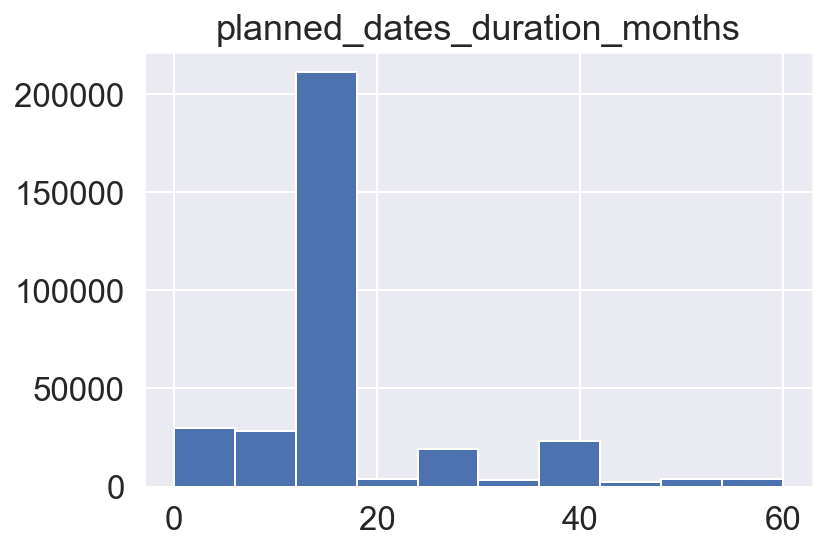

In [158]:
# ... and 5 years
duration[duration<=60].hist();
display(duration[duration<=60].describe())
plt.show();

,planned_dates_duration_months
count,265761.000000
mean,10.619212
std,3.177034
min,0.000000
25%,12.000000
50%,12.000000
75%,12.000000
max,12.000000


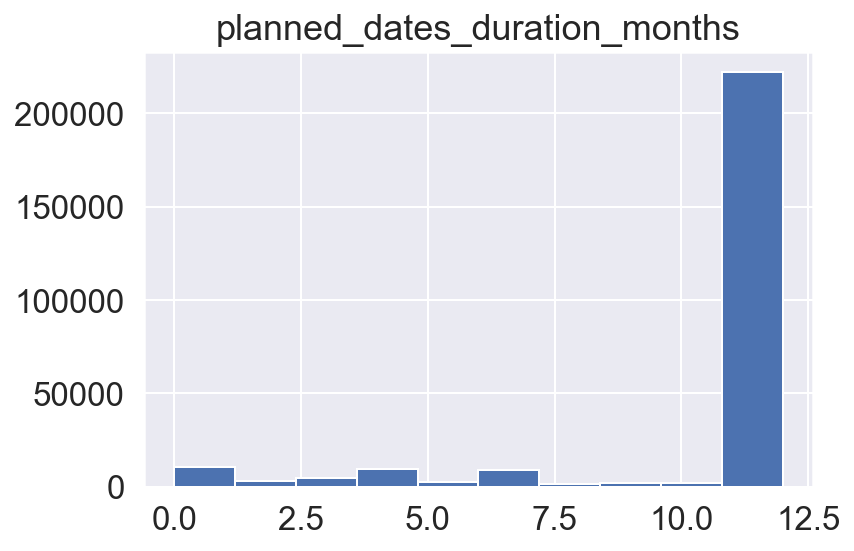

In [159]:
# ... and 1 year
duration[duration<=12].hist();
display(duration[duration<=12].describe())
plt.show();

I think it should be safe to impute 12 months as the planned though it won't have much of a correlation with grant value.

In [186]:
idx = (df_final['planned_dates_duration_months']!=df_final['planned_dates_duration_months']) | (df_final['planned_dates_duration_months']==1080)
df_final.loc[idx,'planned_dates_duration_months'] = 12

In [189]:
df_final[df_final['recipient_district_geographic_code'].isnull()]

,identifier,currency,title,description,amount_awarded,award_date,recipient_org_identifier,recipient_org_name,funding_org_identifier,funding_org_name,recipient_district_geographic_code,planned_dates_duration_months
12,360G-SE-2011019627LOTT_2012-04-17,GBP,Estate Based Football Project,Funding under Sport England's Small Grants fun...,8360.0,2012-04-17,360G-SE-London Borough Waltham Forest,London Borough Waltham Forest,GB-COH-RC000766,Sport England,NaN,11.0
44,360G-SE-20076178LOTT_2009-04-15,GBP,Urban Active,Funding under Sport England's Community Progra...,81924.0,2009-04-15,360G-SE-London Borough Of Barnet,London Borough Of Barnet,GB-COH-RC000766,Sport England,NaN,37.0
49,360G-SE-20074996LOTT_2009-04-17,GBP,Coaching Qualifications,Funding under Sport England's Community Progra...,250000.0,2009-04-17,360G-SE-Skills Active,Skills Active,GB-COH-RC000766,Sport England,NaN,16.0
52,360G-SE-20084583LOTT_2009-04-21,GBP,Swimming Pool & World Class Diving Facility,Funding under Sport England's Community Progra...,500000.0,2009-04-21,360G-SE-Southend on Sea Borough Council,Southend on Sea Borough Council,GB-COH-RC000766,Sport England,NaN,30.0
57,360G-SE-20087886EXCH_2009-04-21,GBP,Pilot RIC,Funding under Sport England's Recruit into Coa...,61500.0,2009-04-21,GB-COH-03258930,Greater Sport,GB-COH-RC000766,Sport England,NaN,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...
561419,360G-EQFoundation-0117,GBP,Grant to Upreach Charitable Company,Unrestricted,15000.0,2021-03-10,GB-CHC-1158896,Upreach Charitable Company,GB-CHC-1161209,The EQ Foundation,NaN,12.0
561420,360G-EQFoundation-0118,GBP,Grant to Five Talents,Via The Funding Network,2000.0,2021-03-15,GB-CHC-1113969,Five Talents UK,GB-CHC-1161209,The EQ Foundation,NaN,12.0
561421,360G-EQFoundation-0119,GBP,Grant to Five Talents,Via The Funding Network,2000.0,2021-03-15,GB-CHC-1155064,Global Feedback,GB-CHC-1161209,The EQ Foundation,NaN,12.0
561422,360G-EQFoundation-0120,GBP,Grant to Foodcycle,Unrestricted,15000.0,2021-03-25,GB-CHC-1134423,Foodcycle,GB-CHC-1161209,The EQ Foundation,NaN,12.0


##### Geographic Code

In [193]:
missing_geos = df_final[df_final['recipient_district_geographic_code'].isnull()]

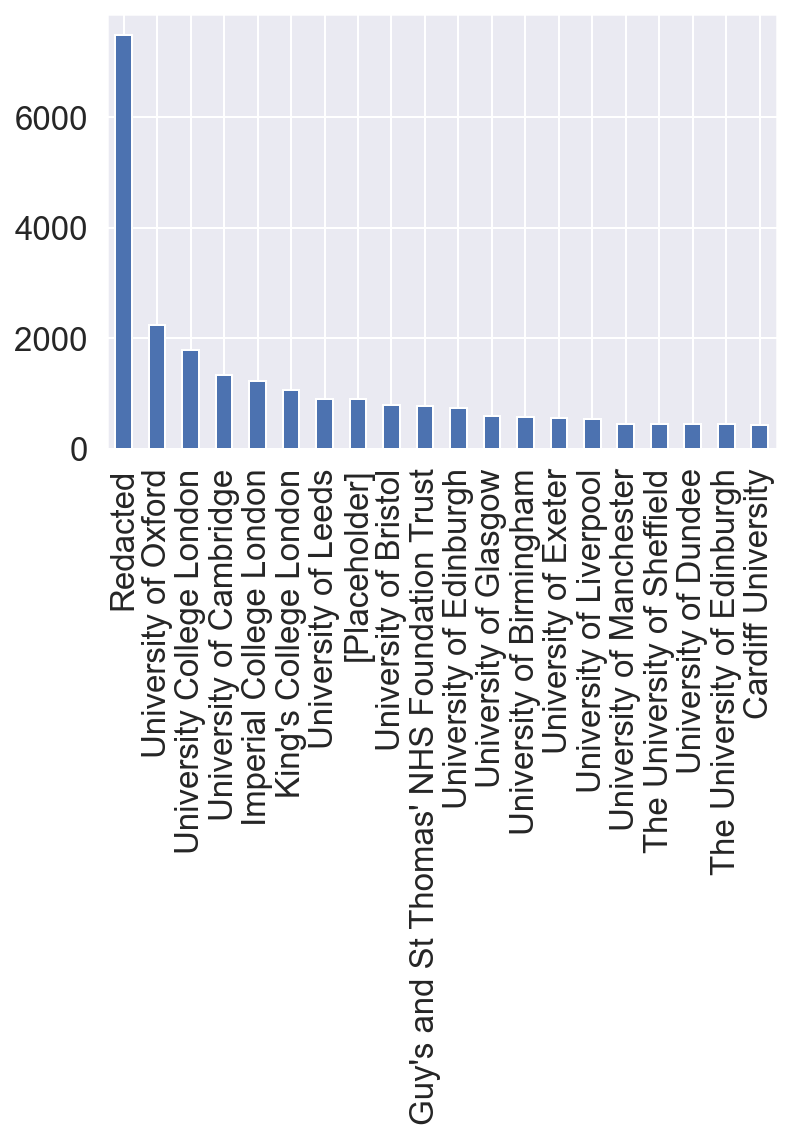

In [215]:
missing_geos['recipient_org_name'].value_counts().head(20).plot(kind='bar');

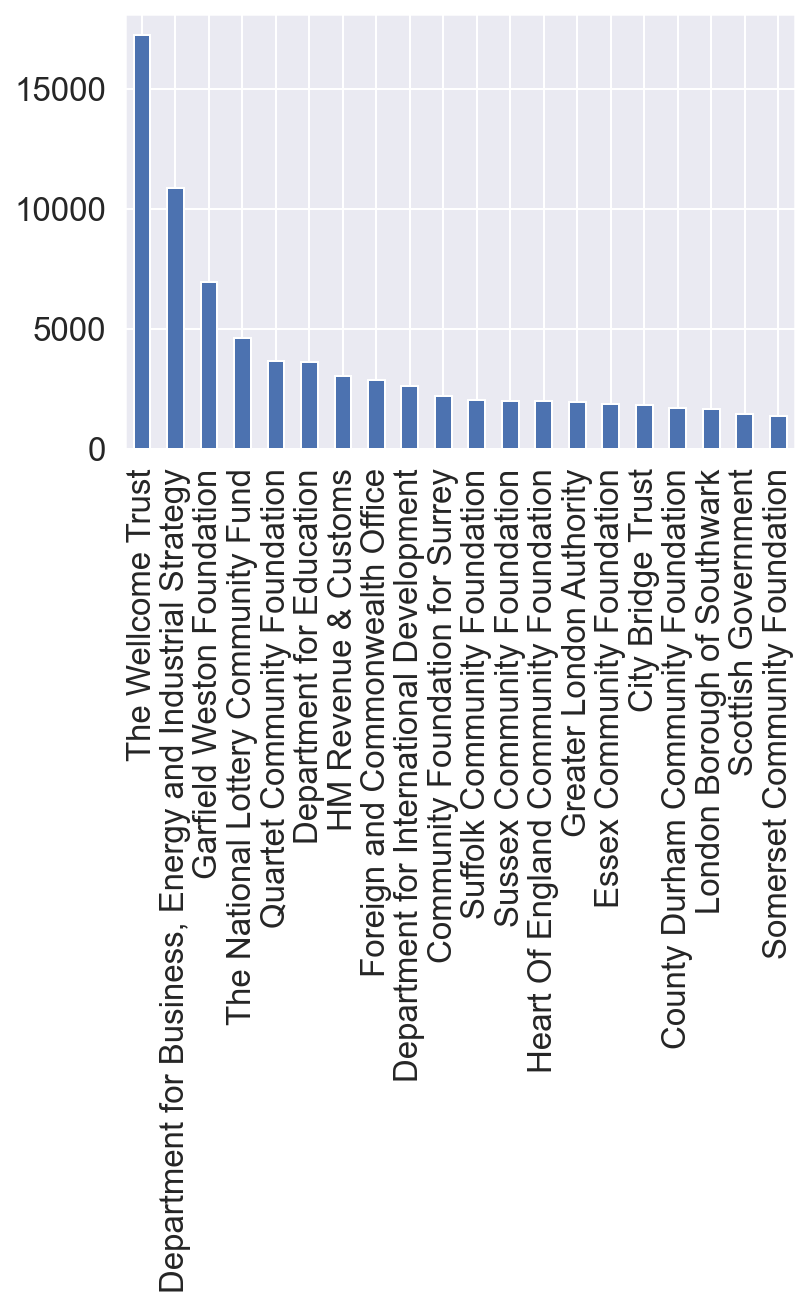

In [216]:
missing_geos['funding_org_name'].value_counts().head(20).plot(kind='bar');

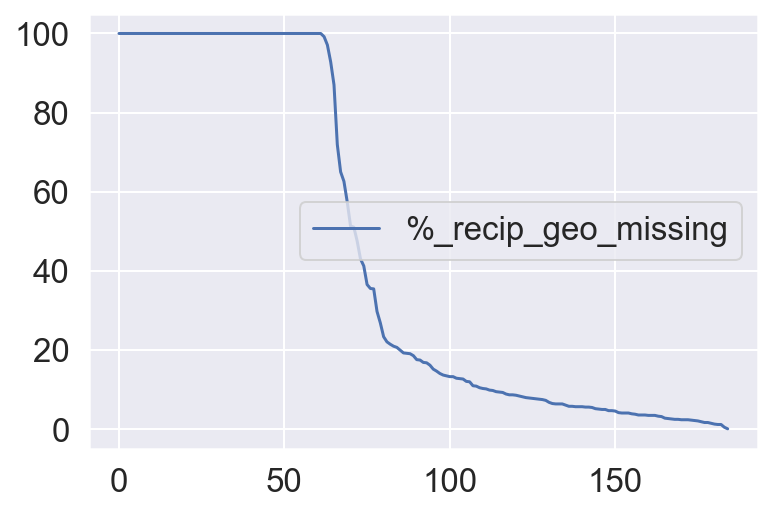

In [308]:
missing_geos_by_funder = pd.DataFrame(missing_geos.groupby(['funding_org_name'])['recipient_org_name'].count()).rename(columns={'recipient_org_name':'grants_without_geo_code'})
count_map = df_final.groupby(['funding_org_name'])['recipient_org_name'].count().sort_values(ascending=False).to_dict()
missing_geos_by_funder['all_count'] = missing_geos_by_funder.index.map(count_map)
missing_geos_by_funder['%_recip_geo_missing'] = round((missing_geos_by_funder['grants_without_geo_code'] / missing_geos_by_funder['all_count'])*100,1)
missing_geos_by_funder = missing_geos_by_funder.sort_values(['%_recip_geo_missing','grants_without_geo_code'], ascending=False)
missing_geos_by_funder['%_recip_geo_missing'].reset_index().plot();

In [309]:
missing_geos_by_funder['%_recip_geo_missing']

funding_org_name
The Wellcome Trust                        100.0
Garfield Weston Foundation                100.0
Quartet Community Foundation              100.0
Foreign and Commonwealth Office           100.0
Community Foundation for Surrey           100.0
                                          ...  
Cloudesley                                  1.2
Macc                                        1.1
The Charity of Sir Richard Whittington      1.1
Mercers' Charitable Foundation              0.4
The National Lottery Heritage Fund          0.0
Name: %_recip_geo_missing, Length: 185, dtype: float64

In [310]:
prop_miss = missing_geos_by_funder['%_recip_geo_missing'].values
percentiles = [scipy.stats.percentileofscore(prop_miss, g, kind='mean') for g in prop_miss]

In [311]:
missing_geos_by_funder['percentiles'] = percentiles

In [325]:
print('75th and above percentile:')
phf.print_full(missing_geos_by_funder[(missing_geos_by_funder['percentiles']>75)][['%_recip_geo_missing','percentiles']])
print()
print('50th to 75th percentile')
missing_geos_by_funder[(missing_geos_by_funder['percentiles']>50) & (missing_geos_by_funder['percentiles']<=75)][['%_recip_geo_missing','percentiles']]
print()
print('25th to 50th percentile:')
missing_geos_by_funder[(missing_geos_by_funder['percentiles']>25) & (missing_geos_by_funder['percentiles']<=50)][['%_recip_geo_missing','percentiles']]
print()
print('25th percentile and under:')
missing_geos_by_funder[missing_geos_by_funder['percentiles']<=25][['%_recip_geo_missing','percentiles']]

75th and above percentile:


,%_recip_geo_missing,percentiles
funding_org_name,,
The Wellcome Trust,100.00,83.24
Garfield Weston Foundation,100.00,83.24
Quartet Community Foundation,100.00,83.24
Foreign and Commonwealth Office,100.00,83.24
Community Foundation for Surrey,100.00,83.24
Suffolk Community Foundation,100.00,83.24
Sussex Community Foundation,100.00,83.24
Heart Of England Community Foundation,100.00,83.24
Greater London Authority,100.00,83.24



50th to 75th percentile


,%_recip_geo_missing,percentiles
funding_org_name,,
HM Revenue & Customs,99.2,66.216216
Halifax Foundation for Northern Ireland,97.1,65.675676
LGBT Consortium,92.8,65.135135
Department for International Development,87.0,64.594595
Unbound Philanthropy,71.9,64.054054
Trafford Housing Trust,65.0,63.513514
Ministry of Justice,62.6,62.972973
City Bridge Trust,57.4,62.432432
Cheshire Community Foundation,51.3,61.891892



25th to 50th percentile:


,%_recip_geo_missing,percentiles
funding_org_name,,
Pears Foundation,16.8,50.000000
Dundee City Council,16.7,49.459459
ZING,16.1,48.918919
Three Guineas Trust,15.1,48.378378
"Ministry for Housing, Communities and Local Government",14.6,47.837838
The Joseph Rank Trust,14.0,47.297297
The Segelman Trust,13.6,46.756757
Joseph Levy Foundation,13.4,46.216216
Paul Hamlyn Foundation,13.2,45.405405



25th percentile and under:


,%_recip_geo_missing,percentiles
funding_org_name,,
Esmée Fairbairn Foundation,5.6,24.594595
"Department for Digital, Culture, Media & Sport",5.6,24.594595
Glasgow City Council,5.6,24.594595
"Department for Digital, Culture, Media and Sport",5.5,23.243243
Nationwide Foundation,5.5,23.243243
The AIM Foundation,5.4,22.432432
LandAid Charitable Trust,5.1,21.891892
Tuixen Foundation,5.0,21.351351
National Churches Trust,4.9,20.540541


It looks like a good portion of funders would be removed from dataset if `recipient_district_geographic_code` nulls was dropped.

It is probably worth checking that for those with low recipient geo count whether we do have other recipient data as it may be that these funders fill in other variables.

In [317]:
recip_geo_columns = ['Recipient Org:Identifier', 'Recipient Org:Name', 'Funding Org:Name',
       'Recipient Org:Charity Number', 'Recipient Org:Company Number',
       'Recipient Org:Postal Code',
       'Recipient Org:Location:0:Geographic Code Type',
       'Recipient Org:Location:0:Geographic Code',
       'Recipient Org:Location:0:Name',
       'Recipient Org:Location:1:Geographic Code Type',
       'Recipient Org:Location:1:Geographic Code',
       'Recipient Org:Location:1:Name',
       'Recipient Org:Location:2:Geographic Code Type',
       'Recipient Org:Location:2:Geographic Code',
       'Recipient Org:Location:2:Name']

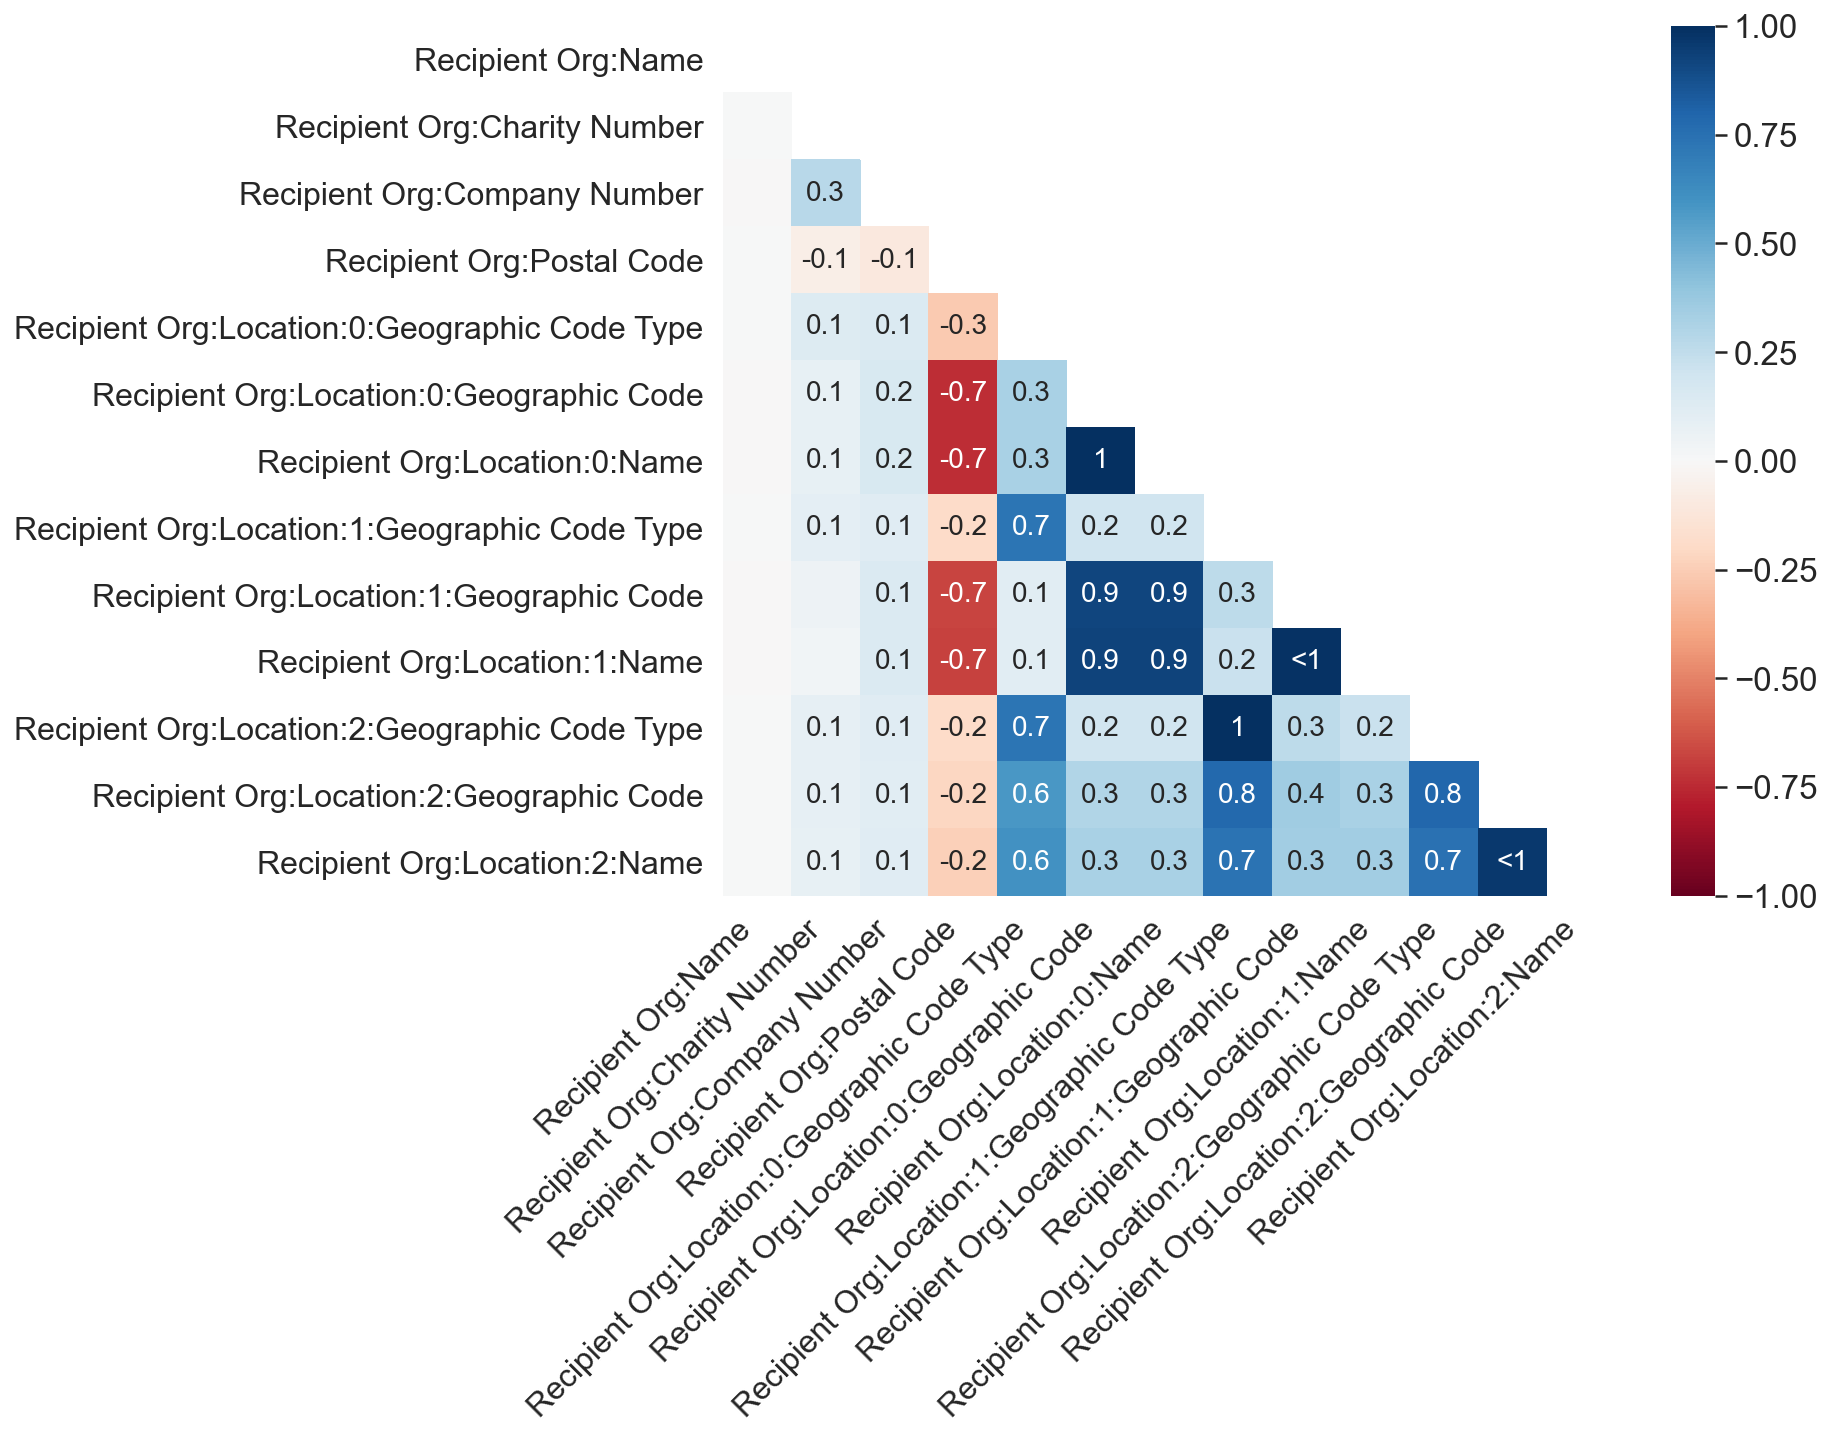

In [373]:
msno.heatmap(df_nonullcols[recip_geo_columns],figsize=(10,8));

Looks like postal code is negatively correlated with geo code for repicipients.  Let's check for those in the 50 and above percentile:

In [374]:
percentile_50th_idx = missing_geos_by_funder[(missing_geos_by_funder['percentiles']>50)].index
low_geo_funders = data[data['Funding Org:Name'].isin(percentile_50th_idx)]

In [375]:
low_geo_funders = low_geo_funders[['Identifier', 'Funding Org:Name', 'Recipient Org:Postal Code',
       'Recipient Org:Location:0:Geographic Code Type',
       'Recipient Org:Location:0:Geographic Code',
       'Recipient Org:Location:0:Name',
       'Recipient Org:Location:1:Geographic Code Type',
       'Recipient Org:Location:1:Geographic Code',
       'Recipient Org:Location:1:Name',
       'Recipient Org:Location:2:Geographic Code Type',
       'Recipient Org:Location:2:Geographic Code',
       'Recipient Org:Location:2:Name']]

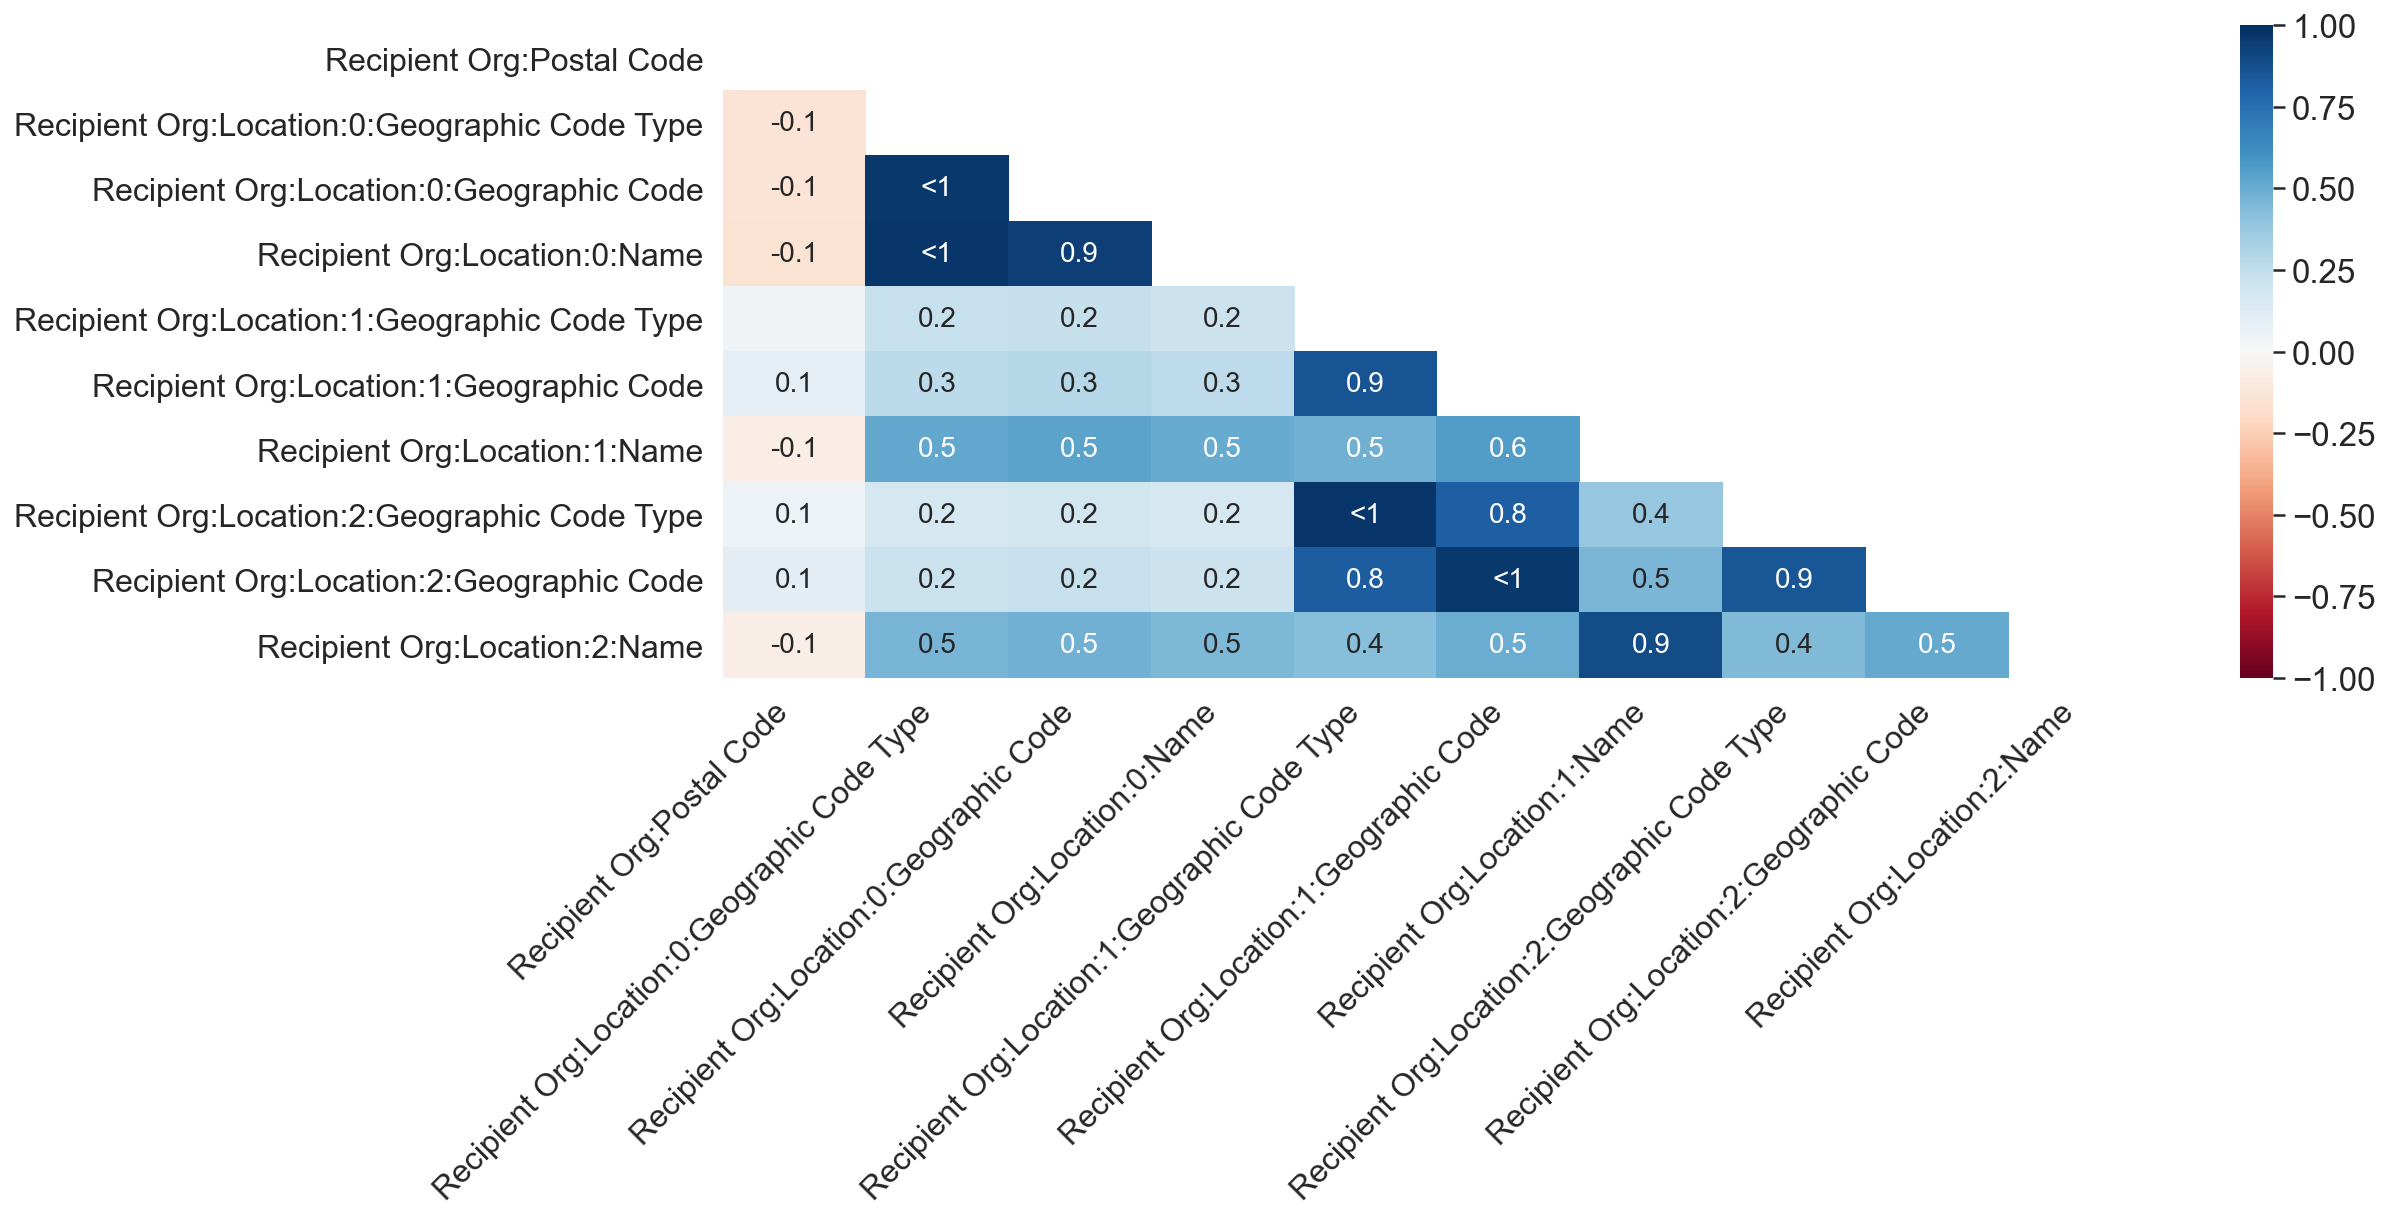

In [376]:
msno.heatmap(low_geo_funders,figsize=(16,6));

In [377]:
low_geo_funders_counts = low_geo_funders.groupby(['Funding Org:Name'])[['Recipient Org:Postal Code','Recipient Org:Location:0:Geographic Code']].count()

In [378]:
low_geo_funders_counts['all_count'] = low_geo_funders_counts.index.map(count_map)
low_geo_funders_counts['%_postal'] = (low_geo_funders_counts['Recipient Org:Postal Code']/low_geo_funders_counts['all_count'])*100
low_geo_funders_counts['%_geo_code'] = (low_geo_funders_counts['Recipient Org:Location:0:Geographic Code']/low_geo_funders_counts['all_count'])*100

<AxesSubplot:>

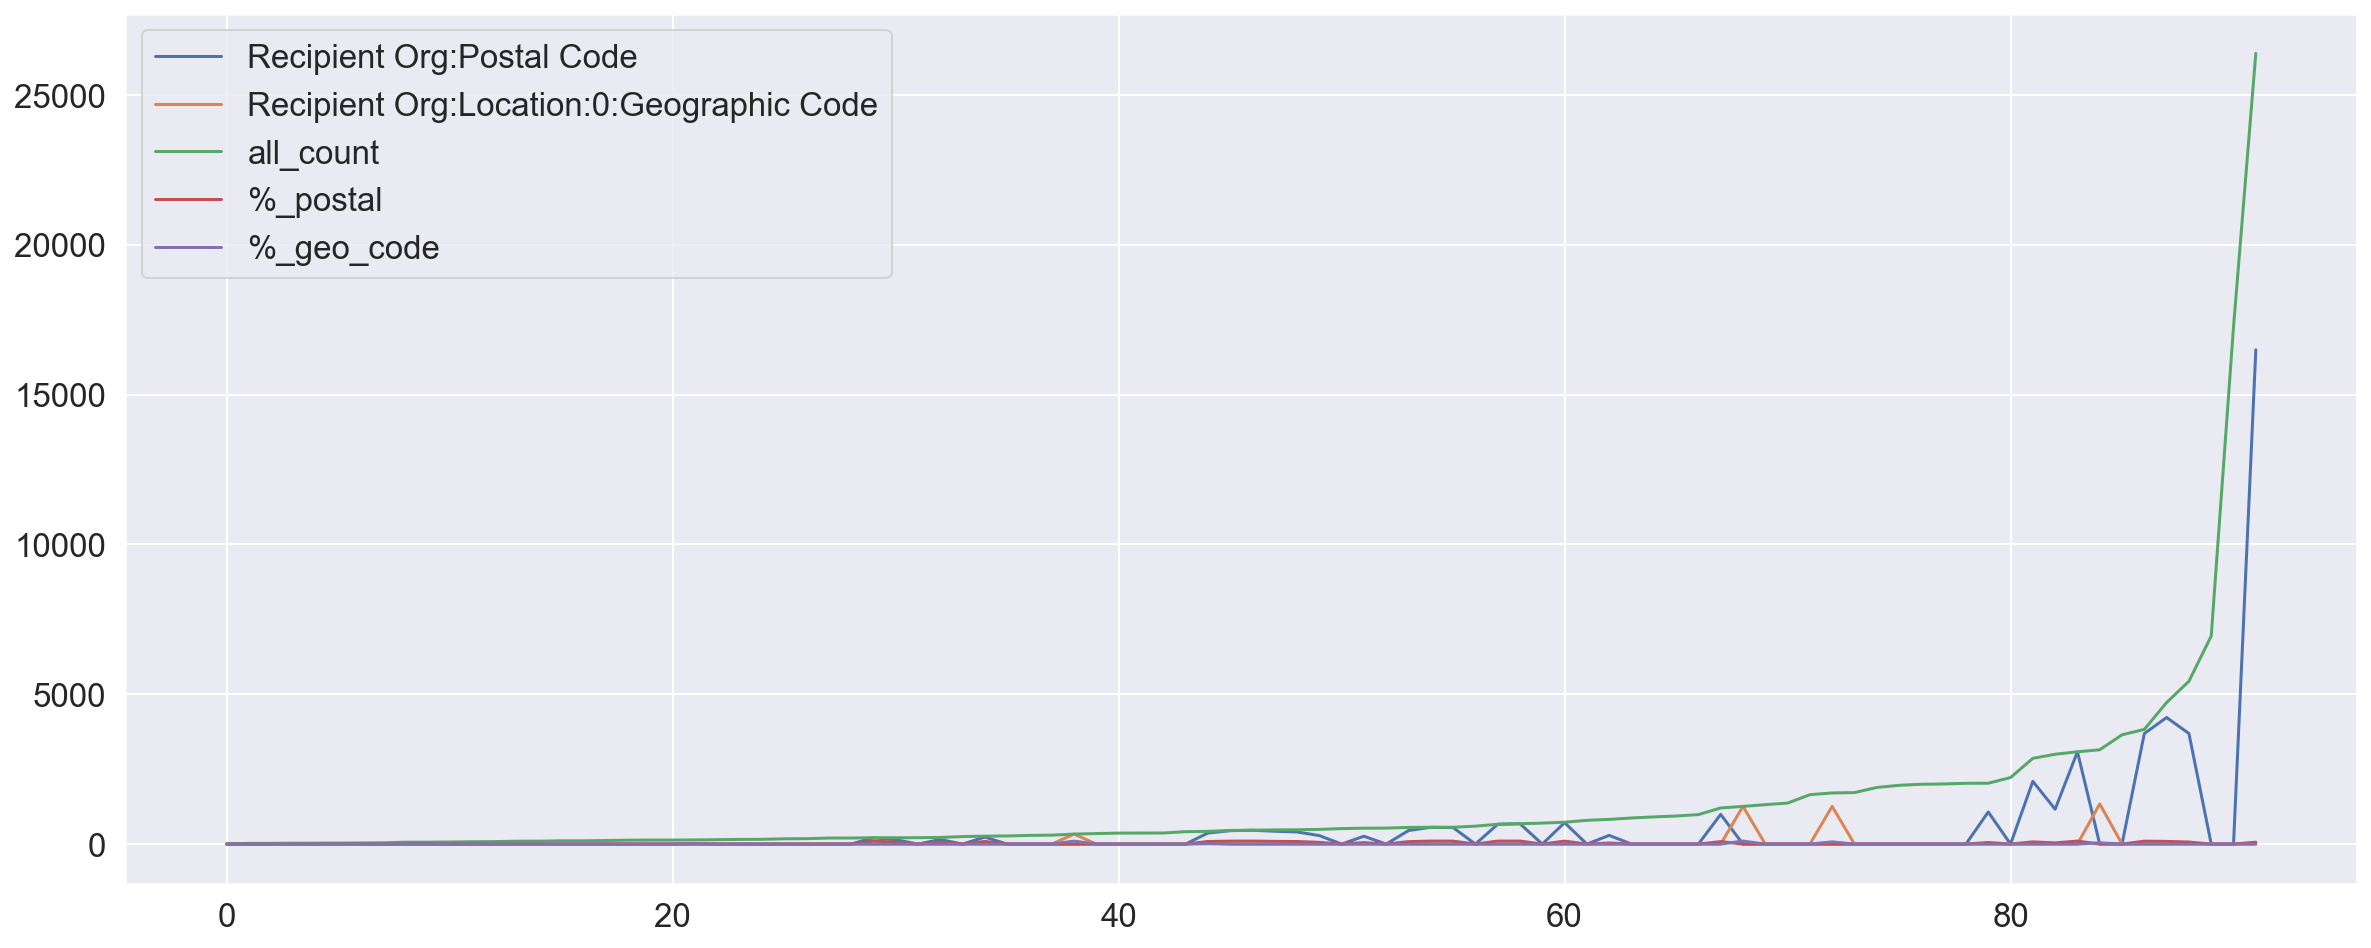

In [379]:
low_geo_funders_counts.sort_values('all_count').reset_index().plot(figsize=(20,8))

In [380]:
phf.print_full(low_geo_funders_counts.sort_values('%_postal', ascending=False))

,Recipient Org:Postal Code,Recipient Org:Location:0:Geographic Code,all_count,%_postal,%_geo_code
Funding Org:Name,,,,,
London Borough of Hounslow,661,0,661,100.00,0.00
HM Revenue & Customs,3079,0,3079,100.00,0.00
Quixote Foundation,560,0,560,100.00,0.00
John Moores Foundation,461,0,461,100.00,0.00
Halifax Foundation for Northern Ireland,678,0,680,99.71,0.00
Lloyd's Register Foundation,210,0,211,99.53,0.00
Department for International Trade,447,0,454,98.46,0.00
Unbound Philanthropy,715,0,729,98.08,0.00
Pears Foundation,550,0,561,98.04,0.00


In [401]:
grantnav_postal_codes = df_nonullcols[['Identifier','Recipient Org:Postal Code']].set_index('Identifier', drop=True).to_dict()['Recipient Org:Postal Code']

We can use the postcodes lookup from the ONS to identify the LA code (`Recipient Org:Location:0:Geographic Code`):

In [425]:
# load file
postcodes_nov_2020 = pd.read_csv(pj(raw_dir,'NSPL_NOV_2020_UK','Data','NSPL_NOV_2020_UK.csv'))

# create postcode lookup
postcode_lookup = pd.Series(postcodes_nov_2020['laua'].values, postcodes_nov_2020['pcd'].str.replace(' ','').values).to_dict()

/Users/marclawson/opt/anaconda3/envs/grantnav_10k_predictor/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (31,36) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [426]:
df_final['postcode'] = df_final['identifier'].map(grantnav_postal_codes)
df_final['postcode'] = df_final['postcode'].str.replace(' ','')
df_final['local_authority_codes'] = df_final['postcode'].map(postcode_lookup)

,postcode,local_authority_codes
0,L44QS,E08000012
1,DE249AJ,E06000015
2,L171AG,E08000012
3,L88DX,E08000012
4,NE388JA,E08000024
...,...,...
561419,NaN,NaN
561420,NaN,NaN
561421,NaN,NaN
561422,NaN,NaN


In [446]:
df_final['recipient_district_geographic_code'] = np.where(df_final['recipient_district_geographic_code']!=df_final['recipient_district_geographic_code'], df_final['local_authority_codes'], df_test['recipient_district_geographic_code'])

In [447]:
missing_geos = df_final[df_final['recipient_district_geographic_code'].isnull()]

Check missing percentiles again

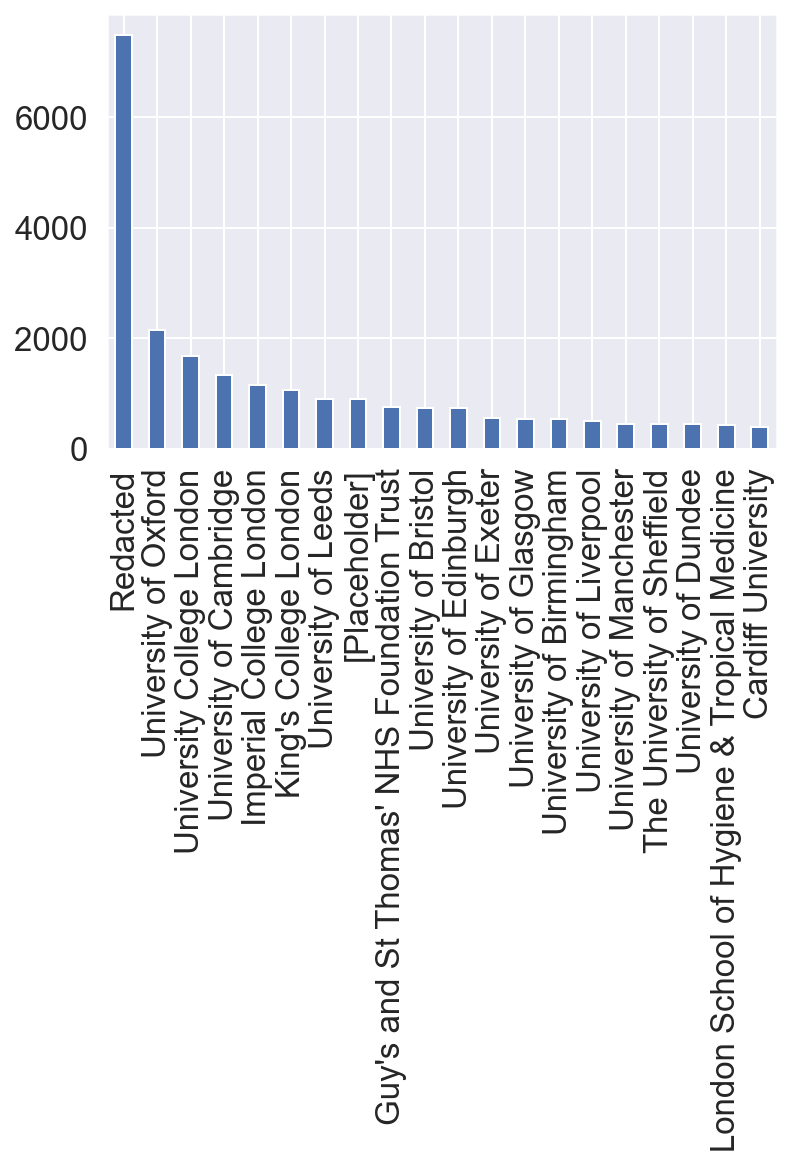

In [448]:
missing_geos['recipient_org_name'].value_counts().head(20).plot(kind='bar');

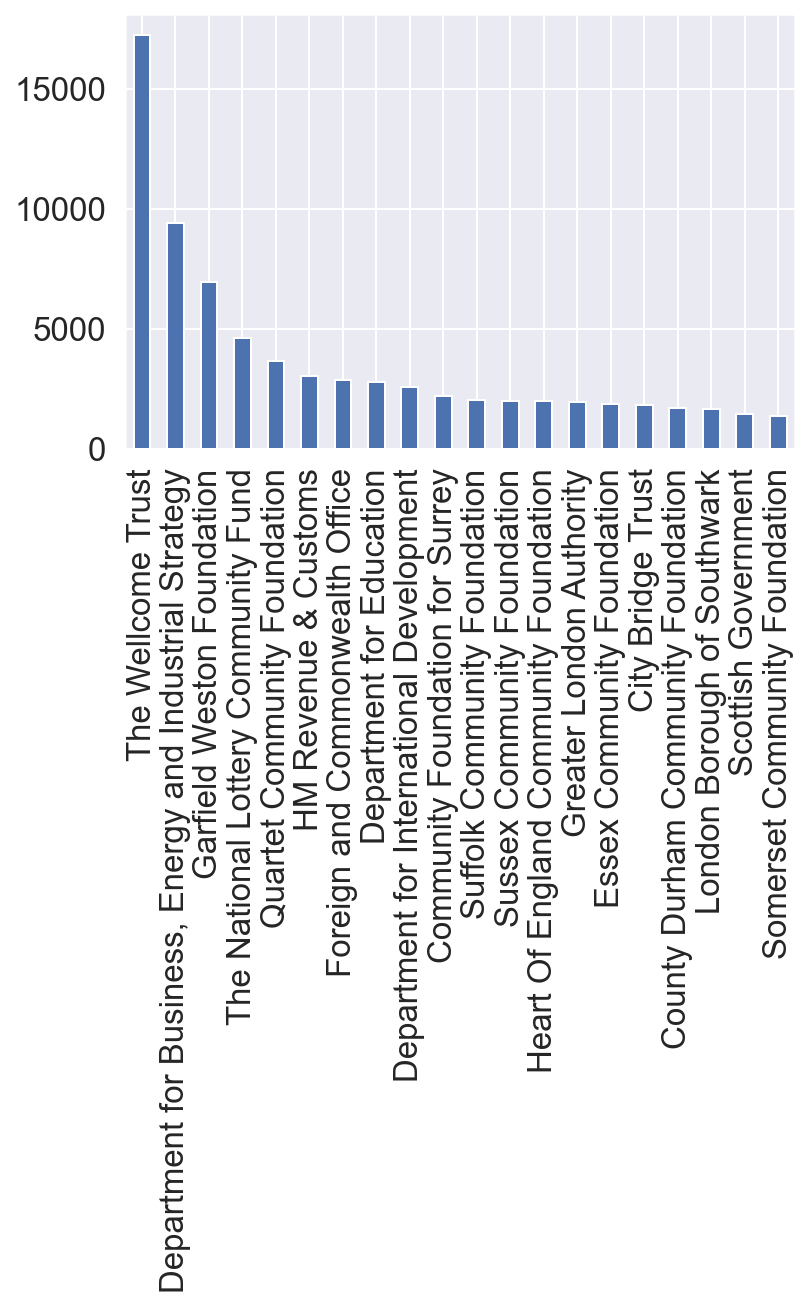

In [449]:
missing_geos['funding_org_name'].value_counts().head(20).plot(kind='bar');

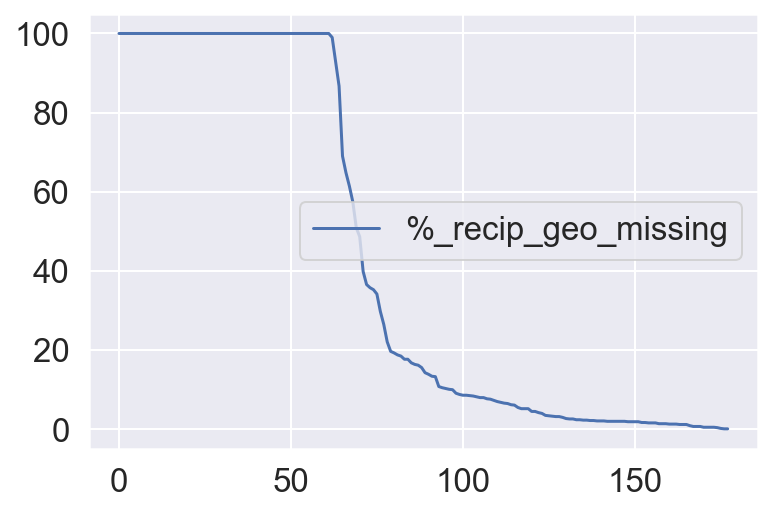

In [450]:
missing_geos_by_funder = pd.DataFrame(missing_geos.groupby(['funding_org_name'])['recipient_org_name'].count()).rename(columns={'recipient_org_name':'grants_without_geo_code'})
count_map = df_final.groupby(['funding_org_name'])['recipient_org_name'].count().sort_values(ascending=False).to_dict()
missing_geos_by_funder['all_count'] = missing_geos_by_funder.index.map(count_map)
missing_geos_by_funder['%_recip_geo_missing'] = round((missing_geos_by_funder['grants_without_geo_code'] / missing_geos_by_funder['all_count'])*100,1)
missing_geos_by_funder = missing_geos_by_funder.sort_values(['%_recip_geo_missing','grants_without_geo_code'], ascending=False)
missing_geos_by_funder['%_recip_geo_missing'].reset_index().plot();

In [454]:
missing_geos_by_funder['%_recip_geo_missing']

funding_org_name
The Wellcome Trust                    100.0
Garfield Weston Foundation            100.0
Quartet Community Foundation          100.0
Foreign and Commonwealth Office       100.0
Community Foundation for Surrey       100.0
                                      ...  
Nuffield Foundation                     0.4
Camden Giving                           0.3
The Childhood Trust                     0.1
The National Lottery Heritage Fund      0.0
Sport England                           0.0
Name: %_recip_geo_missing, Length: 178, dtype: float64

In [455]:
prop_miss = missing_geos_by_funder['%_recip_geo_missing'].values
percentiles = [scipy.stats.percentileofscore(prop_miss, g, kind='mean') for g in prop_miss]

In [456]:
missing_geos_by_funder['percentiles'] = percentiles

In [457]:
print('75th and above percentile:')
phf.print_full(missing_geos_by_funder[(missing_geos_by_funder['percentiles']>75)][['%_recip_geo_missing','percentiles']])
print()
print('50th to 75th percentile')
missing_geos_by_funder[(missing_geos_by_funder['percentiles']>50) & (missing_geos_by_funder['percentiles']<=75)][['%_recip_geo_missing','percentiles']]
print()
print('25th to 50th percentile:')
missing_geos_by_funder[(missing_geos_by_funder['percentiles']>25) & (missing_geos_by_funder['percentiles']<=50)][['%_recip_geo_missing','percentiles']]
print()
print('25th percentile and under:')
missing_geos_by_funder[missing_geos_by_funder['percentiles']<=25][['%_recip_geo_missing','percentiles']]

75th and above percentile:


,%_recip_geo_missing,percentiles
funding_org_name,,
The Wellcome Trust,100.00,82.58
Garfield Weston Foundation,100.00,82.58
Quartet Community Foundation,100.00,82.58
Foreign and Commonwealth Office,100.00,82.58
Community Foundation for Surrey,100.00,82.58
Suffolk Community Foundation,100.00,82.58
Sussex Community Foundation,100.00,82.58
Heart Of England Community Foundation,100.00,82.58
Greater London Authority,100.00,82.58



50th to 75th percentile


,%_recip_geo_missing,percentiles
funding_org_name,,
HM Revenue & Customs,99.0,64.887640
LGBT Consortium,92.8,64.325843
Department for International Development,86.7,63.764045
Unbound Philanthropy,69.0,63.202247
Trafford Housing Trust,64.8,62.640449
Ministry of Justice,61.4,62.078652
City Bridge Trust,57.4,61.516854
Cheshire Community Foundation,50.9,60.955056
Indigo Trust,48.6,60.393258



25th to 50th percentile:


,%_recip_geo_missing,percentiles
funding_org_name,,
The Fore,14.2,49.719101
ZING,13.8,49.157303
"Calouste Gulbenkian Foundation, UK Branch",13.3,48.595506
Home Office,13.2,48.033708
Department of Health,10.7,47.471910
Maudsley Charity,10.4,46.910112
Road Safety Trust,10.2,46.348315
Wates Family Enterprise Trust,10.0,45.786517
The Segelman Trust,9.9,45.224719



25th percentile and under:


,%_recip_geo_missing,percentiles
funding_org_name,,
Community Foundation serving Tyne & Wear and Northumberland,2.3,24.719101
"Department for Digital, Culture, Media & Sport",2.3,24.719101
"Ministry for Housing, Communities and Local Government",2.2,23.595506
Masonic Charitable Foundation,2.2,23.595506
"Ministry of Housing, Communities & Local Government",2.1,22.471910
Wales Council for Voluntary Action,2.1,22.471910
The National Lottery Community Fund,2.0,21.067416
Ministry of Defence,2.0,21.067416
John Moores Foundation,2.0,21.067416


This hasn't changed much as expected but was worth updating anyway.  We should drop the geographical data.

In [463]:
columns = [c for c in df_final.columns if c not in ['recipient_district_geographic_code',
       'postcode', 'local_authority_codes']]
grantnav_data = df_final[columns]

In [465]:
grantnav_data

,identifier,currency,title,description,amount_awarded,award_date,recipient_org_identifier,recipient_org_name,funding_org_identifier,funding_org_name,planned_dates_duration_months
0,360G-SE-2011020480EXCH_2012-04-16,GBP,Active Men Project,Funding under Sport England's Sportsmatch fund...,41100.0,2012-04-16,GB-COH-07626625,Positive Futures North Liverpool Ltd,GB-COH-RC000766,Sport England,11.0
1,360G-SE-2012000041EXCH_2012-04-16,GBP,Sporting Futures Leadership Academy,Funding under Sport England's Sportsmatch fund...,6000.0,2012-04-16,GB-CHC-1041422,Sporting Futures,GB-COH-RC000766,Sport England,11.0
2,360G-SE-2012000173EXCH_2012-04-16,GBP,Choices,Funding under Sport England's Sportsmatch fund...,36750.0,2012-04-16,GB-COH-01696490,Greenbank Project,GB-COH-RC000766,Sport England,11.0
3,360G-SE-2012000554EXCH_2012-04-16,GBP,Florrie Sports,Funding under Sport England's Sportsmatch fund...,15000.0,2012-04-16,GB-COH-05330850,The Florence Institute Trust Ltd,GB-COH-RC000766,Sport England,11.0
4,360G-SE-2010011194LOTT_2012-04-17,GBP,Engaging children and adults in Kwic Cricket s...,Funding under Sport England's Small Grants fun...,692.0,2012-04-17,360G-SE-Barmston Village Primary School,Barmston Village Primary School,GB-COH-RC000766,Sport England,3.0
...,...,...,...,...,...,...,...,...,...,...,...
561419,360G-EQFoundation-0117,GBP,Grant to Upreach Charitable Company,Unrestricted,15000.0,2021-03-10,GB-CHC-1158896,Upreach Charitable Company,GB-CHC-1161209,The EQ Foundation,12.0
561420,360G-EQFoundation-0118,GBP,Grant to Five Talents,Via The Funding Network,2000.0,2021-03-15,GB-CHC-1113969,Five Talents UK,GB-CHC-1161209,The EQ Foundation,12.0
561421,360G-EQFoundation-0119,GBP,Grant to Five Talents,Via The Funding Network,2000.0,2021-03-15,GB-CHC-1155064,Global Feedback,GB-CHC-1161209,The EQ Foundation,12.0
561422,360G-EQFoundation-0120,GBP,Grant to Foodcycle,Unrestricted,15000.0,2021-03-25,GB-CHC-1134423,Foodcycle,GB-CHC-1161209,The EQ Foundation,12.0


## 1.3 Grant Value Statistics (Handling Outliers)

We can now look at outliers in the target variable: `amount_awarded`.

One question we should be asking at this point is whether or not we want to split the data out by funders.  This may only become apparent as we progress through the project.

In [587]:
phf.print_full(grantnav_data.set_index('identifier')['amount_awarded'].describe())

count             561,394.00
mean              193,660.78
std             5,068,458.50
min          -121,020,265.00
25%                 4,000.00
50%                 9,854.00
75%                45,300.00
max         1,837,000,000.00
Name: amount_awarded, dtype: float64

Let's remove negative values first of all.

In [595]:
grantnav_data = grantnav_data[grantnav_data['amount_awarded']>0]
phf.print_full(grantnav_data.set_index('identifier')['amount_awarded'].describe())

count             557,864.00
mean              195,501.08
std             5,081,403.50
min                     0.02
25%                 4,004.00
50%                 9,880.00
75%                46,347.75
max         1,837,000,000.00
Name: amount_awarded, dtype: float64

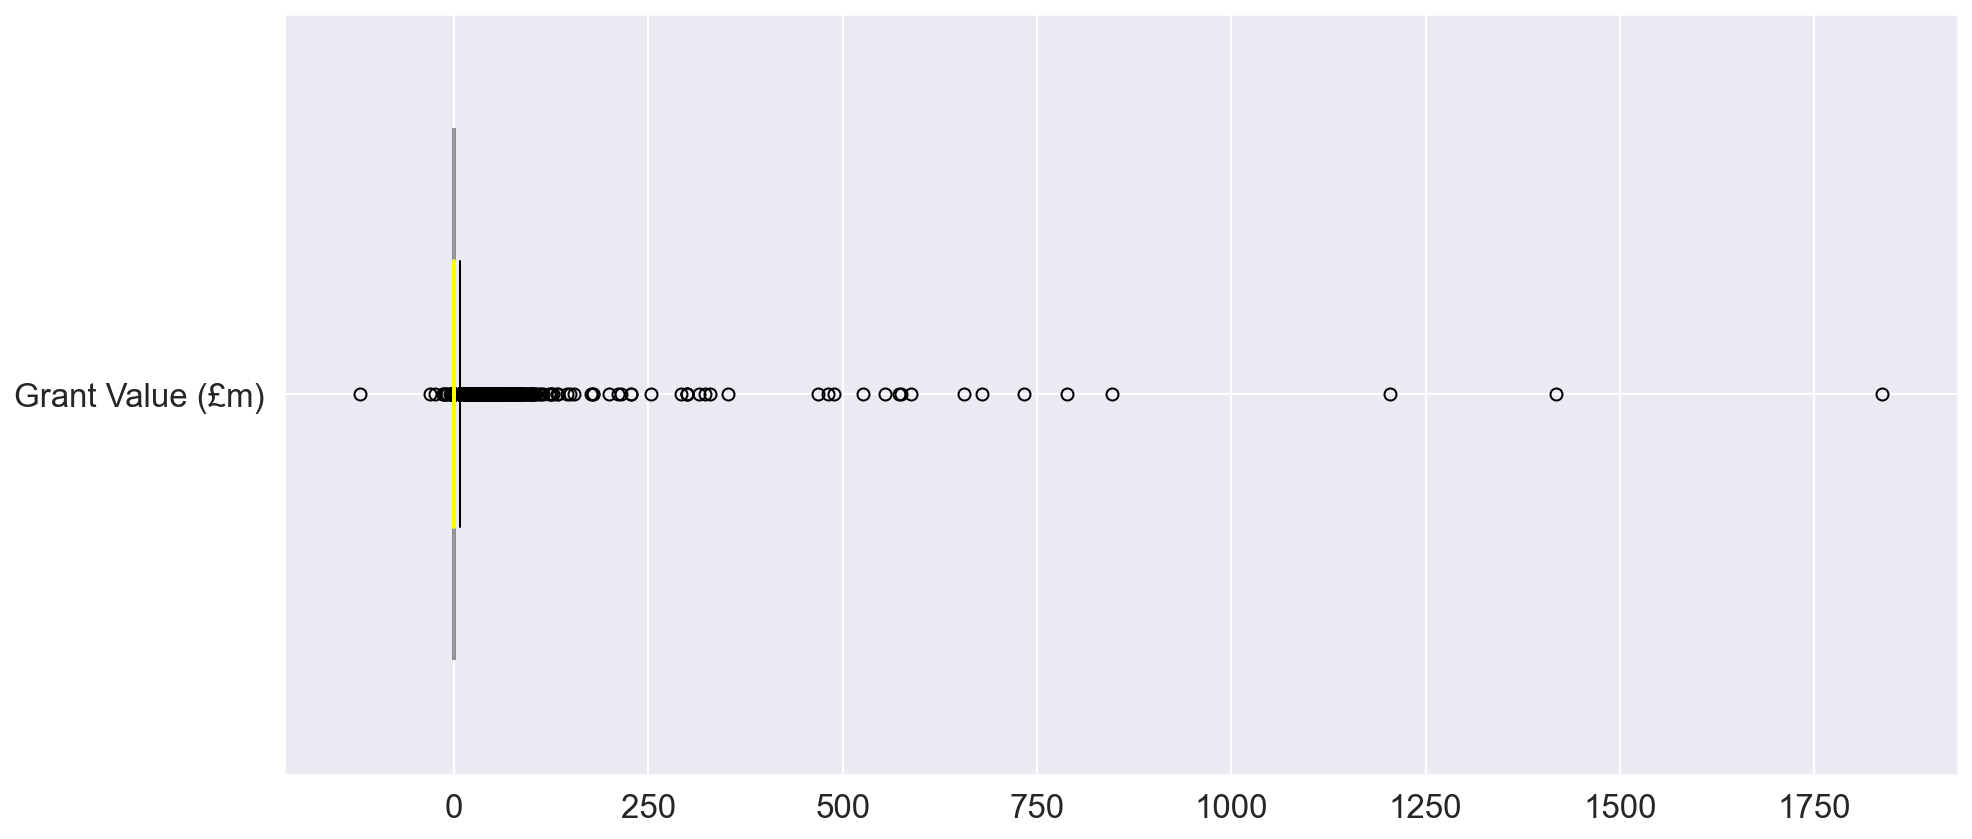

In [596]:
fig, ax = plt.subplots(1, 1, figsize=(15,7))
kwargs = {
    'vert': False,
    'whis': [0.3,99.7],
    'notch': True,
    'labels': [f'Grant Value (\u00A3m)'],
    'widths': .7,
    'patch_artist': True,
    'medianprops': dict(linestyle='-', linewidth=2, color='Yellow'),
    'boxprops': dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
}
ax.boxplot(grant_value/1000000, **kwargs)
plt.show();

The dataset is skewed to the right with 75% of the values 45k or less.  There is a large minus figure and an even larger figure at the other end.  Let's try cutting some out.

I have called this project 'grantnav_10k_predictor' because whilst doing some preliminary work it became obvious that the dataset contained extreme values that needed addressing, and that the power of this dataset in predicting value is going to be with most of the grants much lower in value than the 1.83bn extreme one.  My guess was 10k but below will be an investigation of exactly which values should remain in the analysis.

In [597]:
grant_value = grantnav_data.set_index('identifier')['amount_awarded'].sort_values(ascending=False)
percentiles = [scipy.stats.percentileofscore(grant_value, g, kind='mean') for g in grant_value]
grant_value = pd.DataFrame(grant_value)

In [598]:
grant_value['percentiles'] = percentiles

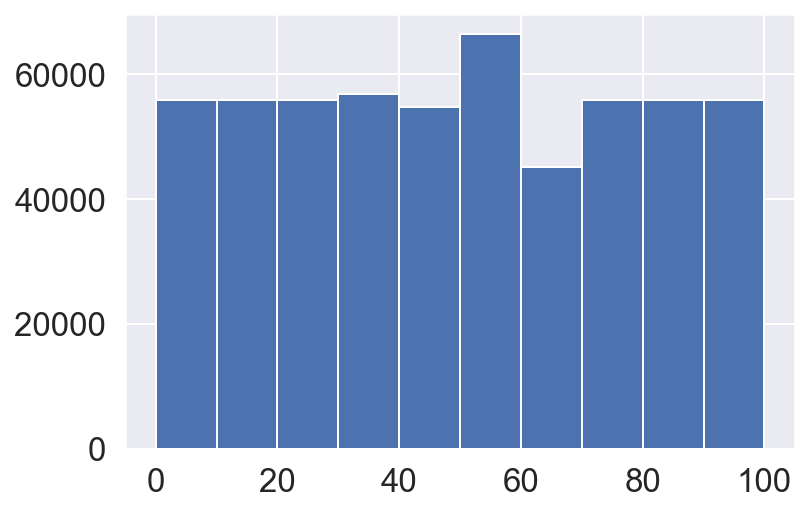

In [599]:
grant_value['percentiles'].hist();

In [600]:
phf.print_full(grant_value.sort_values('percentiles', ascending=False).head())
phf.print_full(grant_value.sort_values('percentiles', ascending=False).tail())

,amount_awarded,percentiles
identifier,,
360G-cabinetoffice-GA-240191,"1,837,000,000.00",100.00
360G-cabinetoffice-GA-060717,"1,418,364,000.00",100.00
360G-cabinetoffice-GA-318586,"1,204,500,000.00",100.00
360G-cabinetoffice-GA-248538,"846,677,305.00",100.00
360G-cabinetoffice-GA-248535,"788,700,000.00",100.00


,amount_awarded,percentiles
identifier,,
360G-cabinetoffice-GA-209750,0.79,0.00
360G-cabinetoffice-GA-313651,0.68,0.00
360G-cabinetoffice-GA-210196,0.67,0.00
360G-cabinetoffice-GA-208187,0.19,0.00
360G-cabinetoffice-GA-481659,0.02,0.00


In [601]:
grant_value.mean()
grant_value[(grant_value['percentiles']>=5) & (grant_value['percentiles']<=95)].mean()

amount_awarded    195501.081507
percentiles           50.000000
dtype: float64

amount_awarded    41383.443083
percentiles          50.008066
dtype: float64

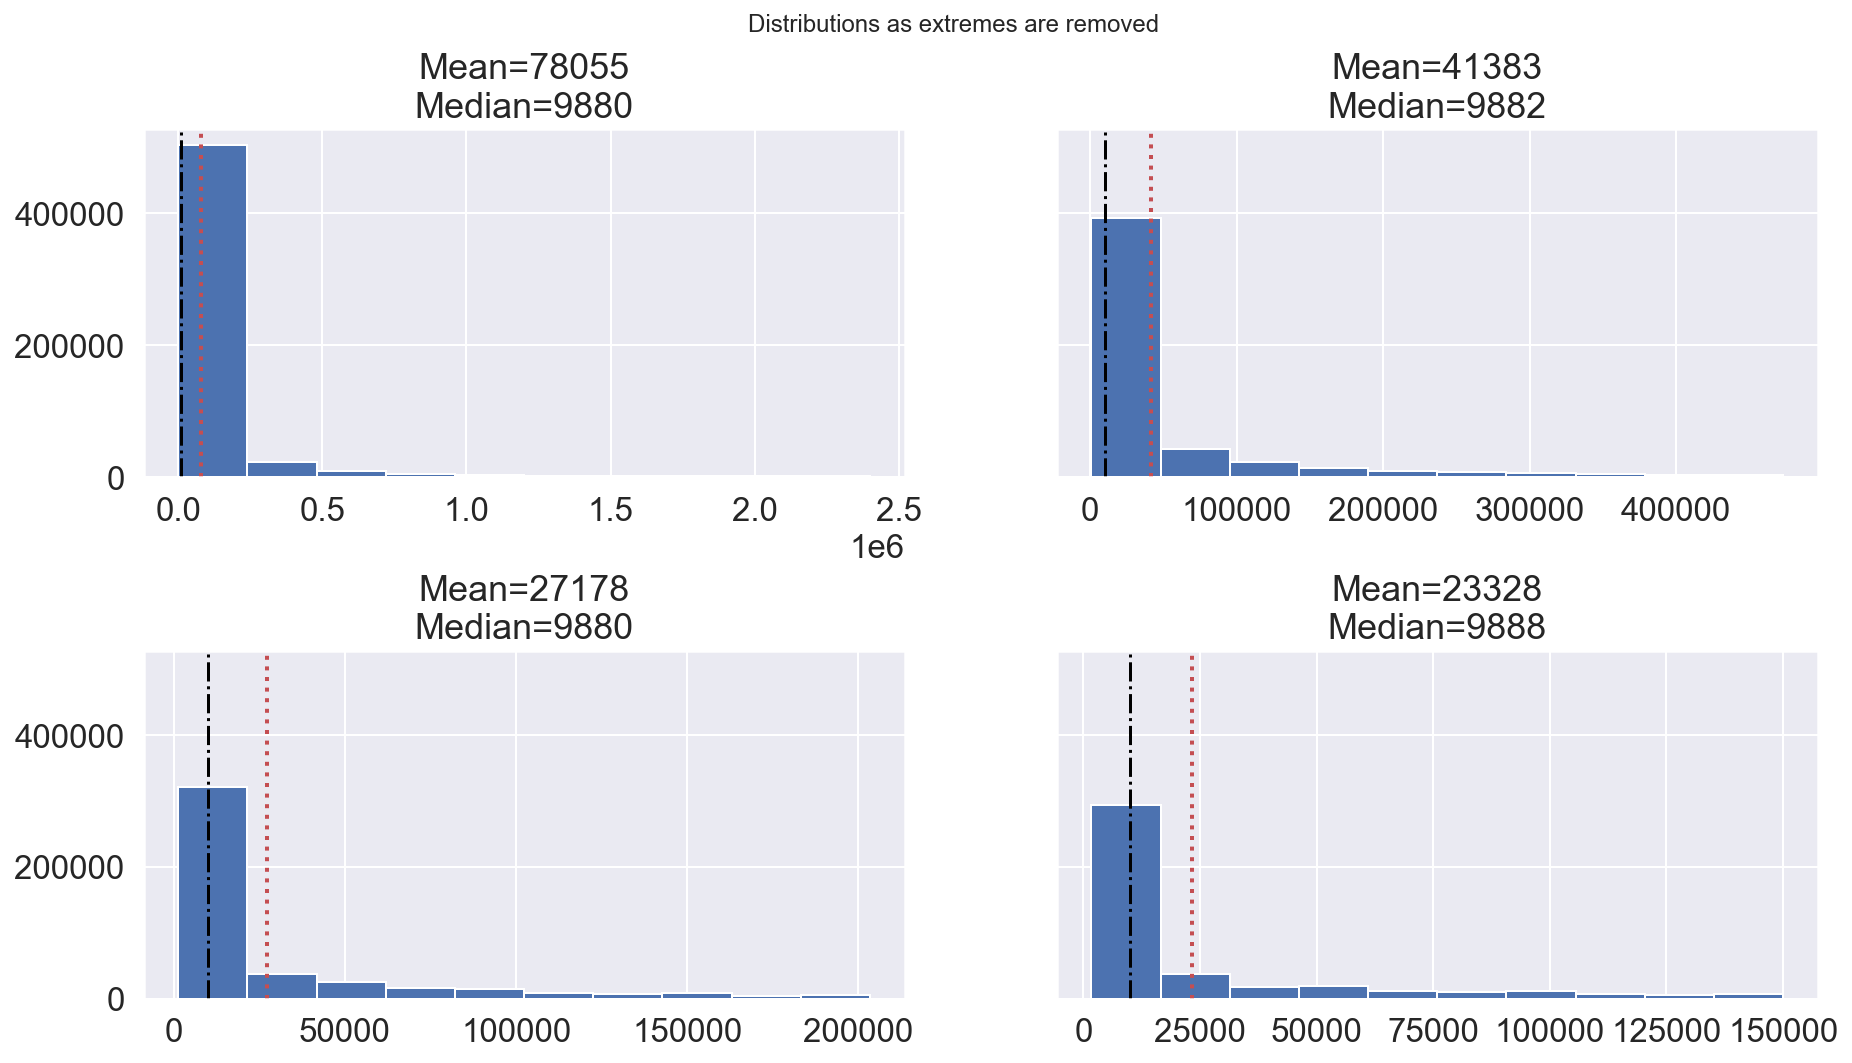

In [603]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(15,8), sharey=True)
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions as extremes are removed')

outlier_scores = [1, 5, 10, 12.5] 
for ax, score in zip(axes.flatten(), outlier_scores):
    ys = grant_value[(grant_value['percentiles']>=score) & (grant_value['percentiles']<=(100-score))]['amount_awarded'].values
    ax.hist(ys)
    ax.axvline(int(round(ys.mean(),0)), color='r', linestyle=':', linewidth=2)
    ax.axvline(int(round(np.median(ys),0)), color='black', linestyle='-.', linewidth=1.5)
    ax.set_title(f"Mean={int(round(ys.mean(),0))}\nMedian={int(round(np.median(ys),0))}")
plt.show();

Add the percentiles to the main dataset...

In [604]:
grant_value

,amount_awarded,percentiles
identifier,,
360G-cabinetoffice-GA-240191,1.837000e+09,99.999910
360G-cabinetoffice-GA-060717,1.418364e+09,99.999731
360G-cabinetoffice-GA-318586,1.204500e+09,99.999552
360G-cabinetoffice-GA-248538,8.466773e+08,99.999373
360G-cabinetoffice-GA-248535,7.887000e+08,99.999193
...,...,...
360G-cabinetoffice-GA-209750,7.900000e-01,0.000807
360G-cabinetoffice-GA-313651,6.800000e-01,0.000627
360G-cabinetoffice-GA-210196,6.700000e-01,0.000448


In [605]:
percentiles = {idx: scipy.stats.percentileofscore(grant_value['amount_awarded'], val, kind='mean') for idx, val in grant_value['amount_awarded'].items()}
grantnav_data['percentiles'] = grantnav_data.identifier.map(percentiles)

In [606]:
mask = (grantnav_data['percentiles']<=95) & (grantnav_data['percentiles']>=1)
outlier_data_95 = grantnav_data[mask].copy()
outlier_data_95.sort_values('amount_awarded',ascending=False)[['amount_awarded','percentiles']]
phf.print_full(outlier_data_95.describe())

,amount_awarded,percentiles
509551,1381438.97,94.871420
509185,1335435.51,94.709194
512094,1284071.58,94.505381
511065,1238584.86,94.356779
507582,1187771.29,94.141135
...,...,...
221279,300.00,1.087720
25912,300.00,1.087720
316202,300.00,1.087720
398704,300.00,1.087720


,amount_awarded,planned_dates_duration_months,percentiles
count,"525,023.00","525,023.00","525,023.00"
mean,"39,985.73",13.68,47.98
std,"78,117.54",8.25,27.14
min,300.00,0.00,1.09
25%,"4,000.00",12.00,24.72
50%,"9,700.00",12.00,48.03
75%,"30,000.00",12.00,71.15
max,"1,381,438.97",372.00,95.00


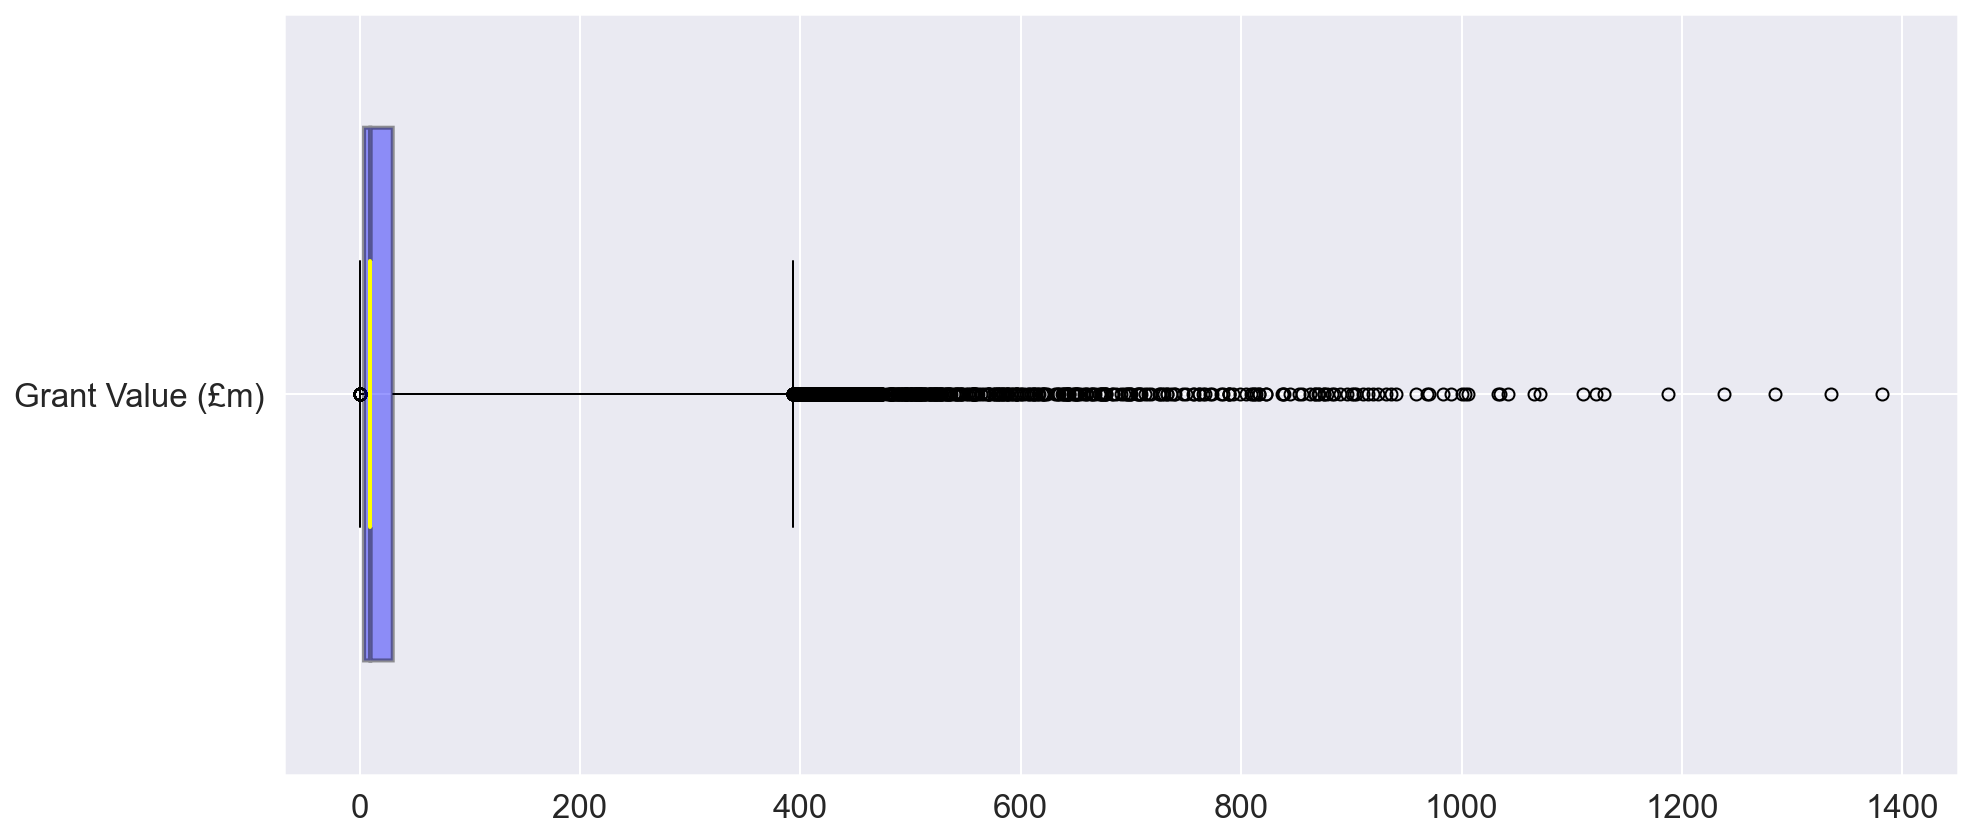

In [607]:
fig, ax = plt.subplots(1, 1, figsize=(15,7))
kwargs = {
    'vert': False,
    'whis': [1,99],
    'notch': True,
    'labels': [f'Grant Value (\u00A3m)'],
    'widths': .7,
    'patch_artist': True,
    'medianprops': dict(linestyle='-', linewidth=2, color='Yellow'),
    'boxprops': dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
}
ax.boxplot(outlier_data_95['amount_awarded']/1000, **kwargs)
plt.show();

In [608]:
mask = (grantnav_data['percentiles']<=90) & (grantnav_data['percentiles']>=1)
outlier_data_90 = grantnav_data[mask].copy()
outlier_data_90.sort_values('amount_awarded',ascending=False)[['amount_awarded','percentiles']]
phf.print_full(outlier_data_90.describe())

,amount_awarded,percentiles
511102,607311.96,89.972735
510550,606933.86,89.963414
510338,602680.48,89.912506
511054,600142.76,89.885976
509901,596781.16,89.645595
...,...,...
28677,300.00,1.087720
28612,300.00,1.087720
69571,300.00,1.087720
38336,300.00,1.087720


,amount_awarded,planned_dates_duration_months,percentiles
count,"497,421.00","497,421.00","497,421.00"
mean,"24,892.61",13.18,45.52
std,"41,453.11",7.21,25.72
min,300.00,0.00,1.09
25%,"3,671.00",12.00,23.23
50%,"9,300.00",12.00,45.55
75%,"22,544.00",12.00,67.80
max,"607,311.96",372.00,90.00


In [609]:
data['amount_awarded'].sort_values()

401964      1081.00
401965      1145.00
478635      1200.00
401970      1529.00
548763      2000.00
            ...    
512269    338634.56
513986    339897.84
512848    340791.22
512258    341072.56
510329    406875.00
Name: amount_awarded, Length: 396141, dtype: float64

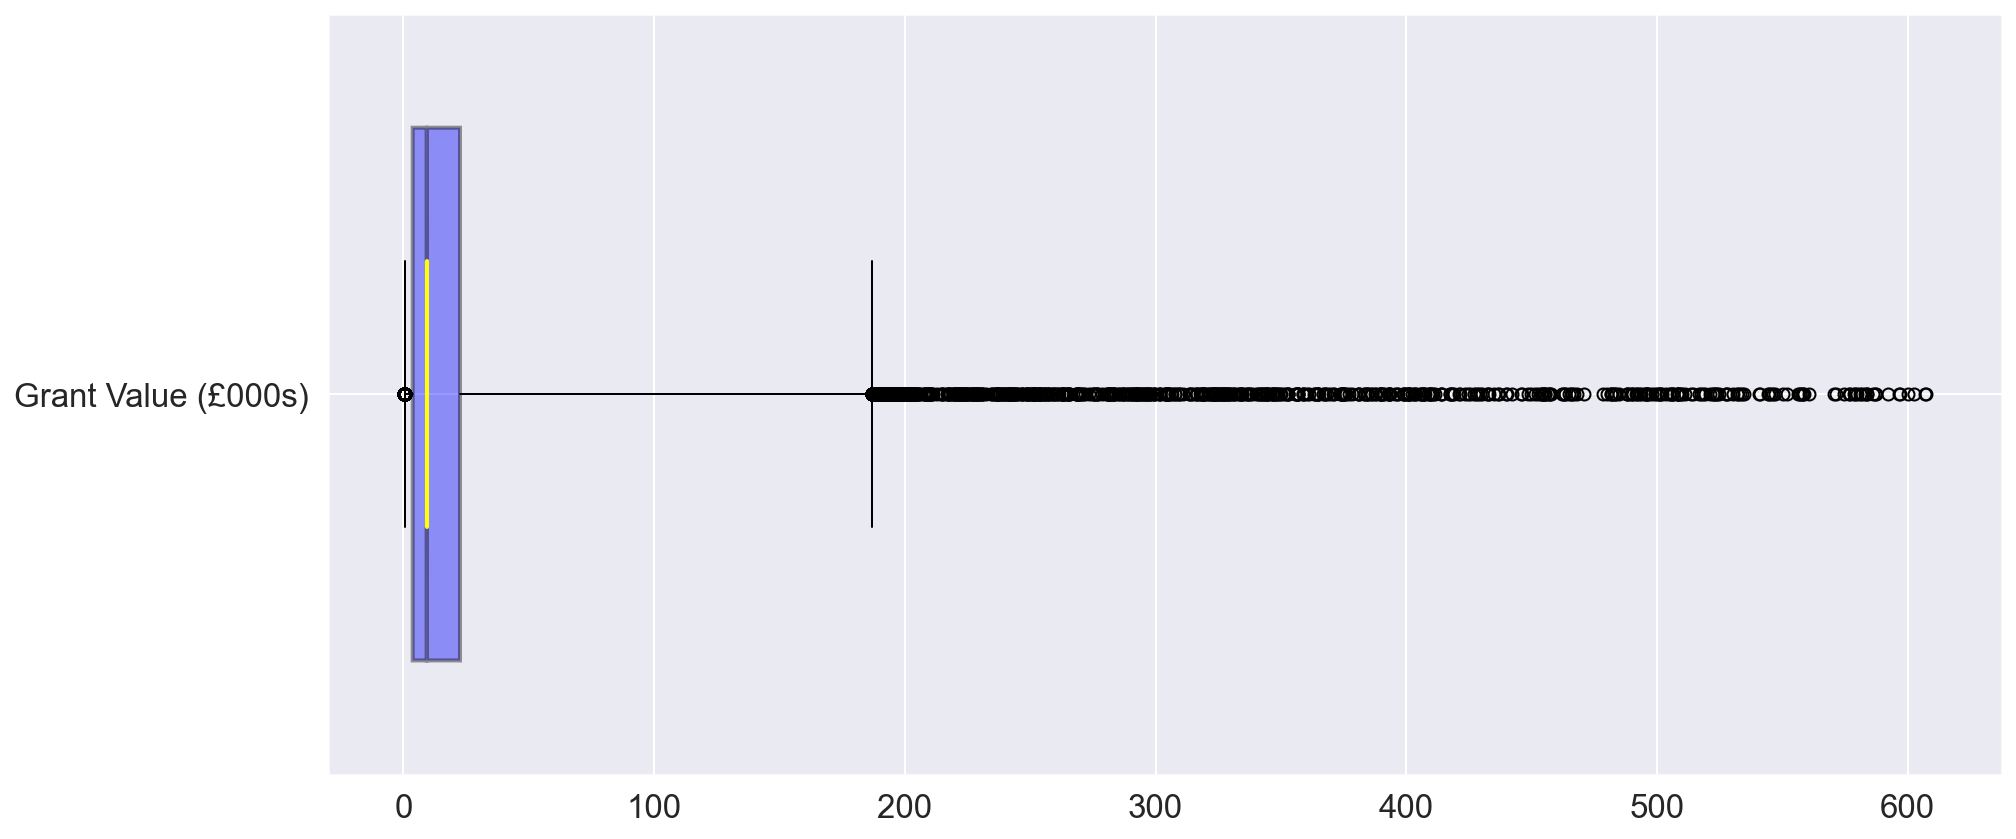

In [610]:
fig, ax = plt.subplots(1, 1, figsize=(15,7))
kwargs = {
    'vert': False,
    'whis': [1,99],
    'notch': True,
    'labels': [f'Grant Value (\u00A3000s)'],
    'widths': .7,
    'patch_artist': True,
    'medianprops': dict(linestyle='-', linewidth=2, color='Yellow'),
    'boxprops': dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
}
ax.boxplot(outlier_data_90['amount_awarded']/1000, **kwargs)
plt.show();

In [611]:
mask = (grantnav_data['amount_awarded']<=10000) & (grantnav_data['amount_awarded']>0)
outlier_data_10k = grantnav_data[mask].copy()
phf.print_full(outlier_data_10k.sort_values('amount_awarded',ascending=False)[['amount_awarded','percentiles']].head(10))
phf.print_full(outlier_data_10k.describe())

,amount_awarded,percentiles
286865,"10,000.00",57.85
293052,"10,000.00",57.85
293095,"10,000.00",57.85
293092,"10,000.00",57.85
293091,"10,000.00",57.85
293090,"10,000.00",57.85
293087,"10,000.00",57.85
293086,"10,000.00",57.85
293078,"10,000.00",57.85
293067,"10,000.00",57.85


,amount_awarded,planned_dates_duration_months,percentiles
count,"345,303.00","345,303.00","345,303.00"
mean,"5,398.61",11.52,30.95
std,"3,477.40",4.07,17.85
min,0.02,0.00,0.00
25%,"2,000.00",12.00,14.74
50%,"5,000.00",12.00,32.21
75%,"9,492.00",12.00,46.42
max,"10,000.00",372.00,57.85


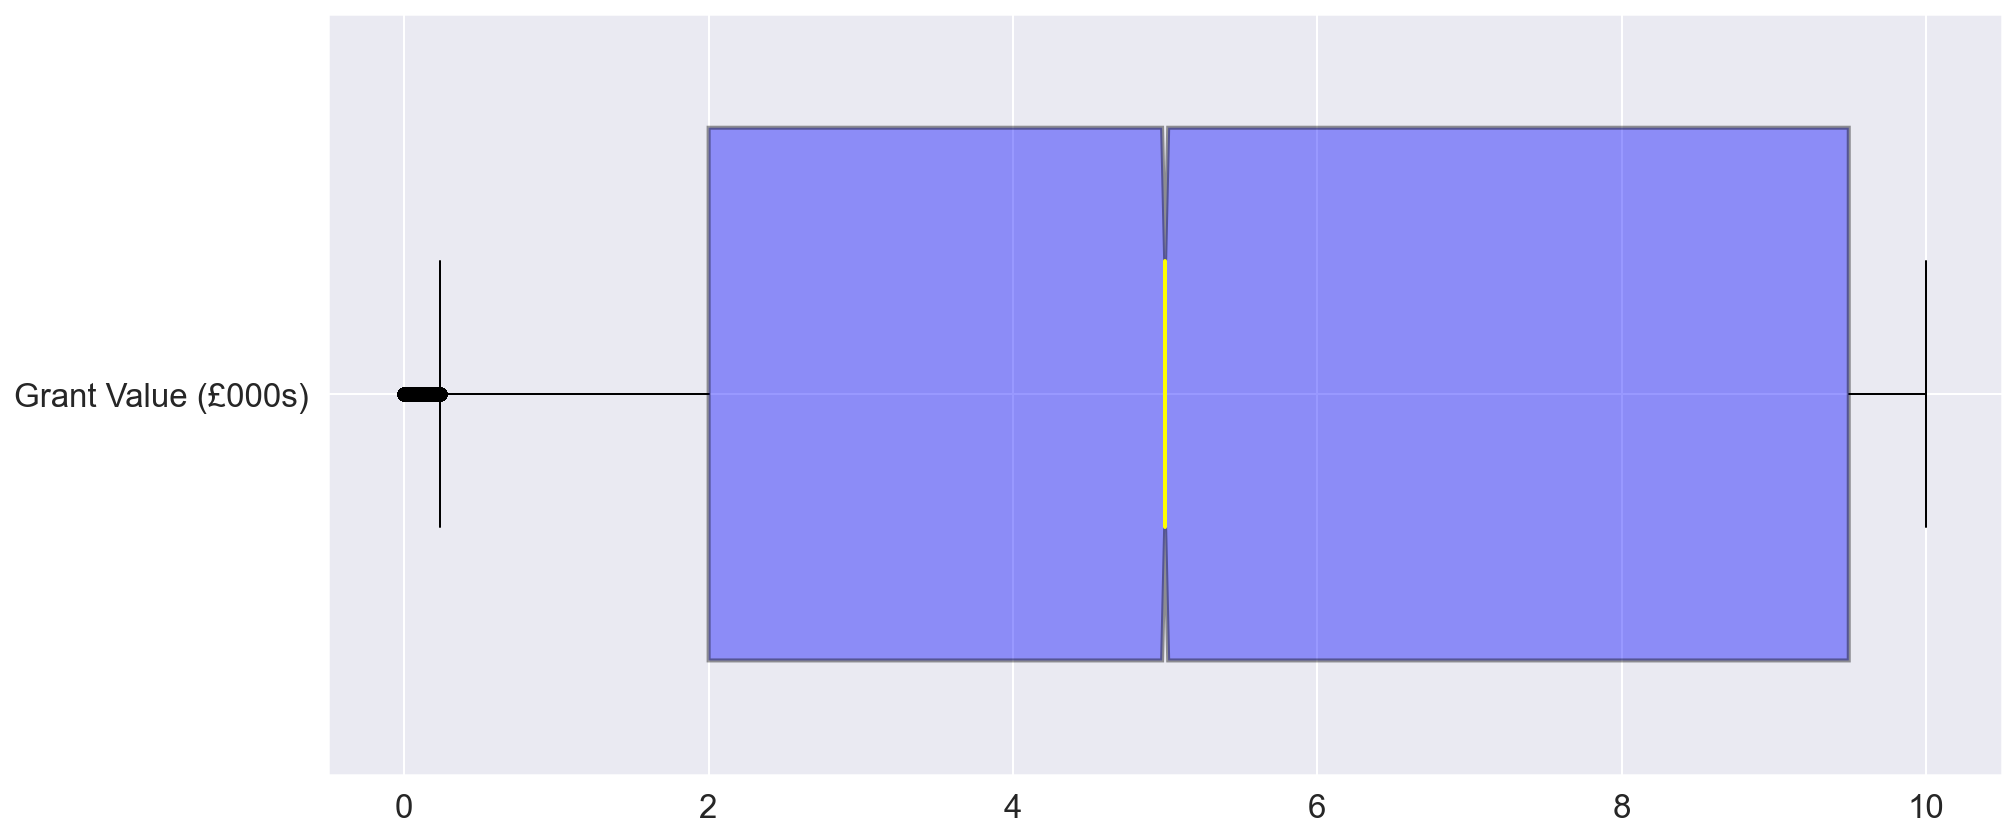

In [612]:
fig, ax = plt.subplots(1, 1, figsize=(15,7))
kwargs = {
    'vert': False,
    'whis': [1,99],
    'notch': True,
    'labels': [f'Grant Value (\u00A3000s)'],
    'widths': .7,
    'patch_artist': True,
    'medianprops': dict(linestyle='-', linewidth=2, color='Yellow'),
    'boxprops': dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
}
ax.boxplot(outlier_data_10k['amount_awarded']/1000, **kwargs)
plt.show();

The data is much better distributed when looking at the 0-10k grant range.  Whether to reduce the dataset to 10k or under sized grants depends on what the use-case is.  Having a smaller range will necessarily entail producing more accurate predictions:  Is 5.6k v 5.8k more useful than someone knowing if they are likely to get either 10k or 50k for a project, from a particular funder.

The normal practice is to remove the values in under the 5th and over the 95th percentiles, which I will keep to.  I may reduce if the results are not great.

In [615]:
# remove the percentile column
outlier_data_95 = outlier_data_95.iloc[:,:-1]

In [617]:
# save data
outlier_data_95.to_csv(pj(interim_dir,'grantnav_data.csv'))